<a href="https://colab.research.google.com/github/vamshichintu002/image_classification/blob/main/VAMSHI_FASTFOOD_MC_CASESTUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from collections import Counter
!pip install bioinfokit
from bioinfokit.visuz import cluster
from statsmodels.graphics.mosaicplot import mosaic
from pandas.plotting import parallel_coordinates

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=23a811d25082eaaeab208f383b165976271955d2a8902e71dddca38be8ce5d02
  Stored in directory: /root/.cache/pip/wheels/c9/ab/ed/8a7fde0a63653b75ac029d67598265d185e5915dfb594ddc59
Successfully built bioinfokit


In [4]:
data = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")
data.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
data.shape

(1453, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [8]:
data_en= data.replace({"Yes":1,"No":0})
data_en.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [9]:
data_en['VisitFrequency'] = data_en['VisitFrequency'].astype('category')
data_en['VisitFrequency'] = data_en['VisitFrequency'].cat.codes

In [10]:
data_en.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,Male


In [11]:
data_en['VisitFrequency'].value_counts()

3    439
0    342
5    252
4    235
2    131
1     54
Name: VisitFrequency, dtype: int64

In [12]:
data['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [13]:
data_en['Like'] = data_en['Like'].astype('category')
data_en['Like'] = data_en['Like'].cat.codes

In [14]:
data_en['Like'].value_counts()

2     229
1     187
8     169
3     160
0     152
9     152
10    143
6      73
7      71
5      59
4      58
Name: Like, dtype: int64

In [15]:
data['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [16]:
data_en.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,Female
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,Female
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,Female
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,Female
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,Male


In [17]:
data_en['Gender'] = data_en['Gender'].astype('category')
data_en['Gender'] = data_en['Gender'].cat.codes

In [18]:
data_en['Gender'].value_counts()


0    788
1    665
Name: Gender, dtype: int64

In [19]:
data['Gender'].value_counts()


Female    788
Male      665
Name: Gender, dtype: int64

In [20]:
data_en.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1


In [21]:
data_en.to_csv('new_df.csv')


In [22]:
data_en.corr()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,-0.251600,-0.281653,-0.023896,-0.062545
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,-0.247663,-0.070597,-0.035920,-0.041402
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,0.022923,0.146217,-0.017184,0.051015
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,-0.015972,-0.139254,0.005929,-0.059707
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,0.098425,-0.233554,0.007803,0.021801
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,-0.067114,-0.020558,0.011130,-0.049027
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,-0.057818,0.016958,0.032753,-0.116050
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,-0.287870,-0.194576,-0.023878,-0.044385
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,0.084583,-0.070851,-0.009614,0.144113
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,-0.024514,0.021366,-0.008230,-0.042455


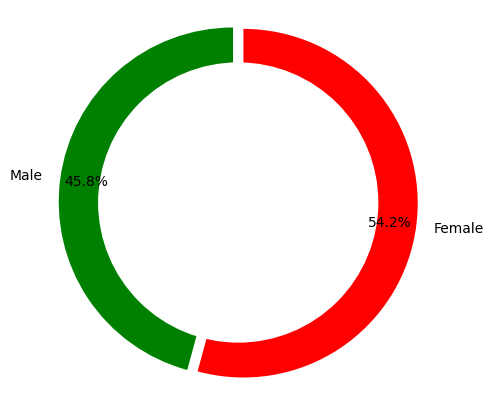

In [23]:
labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]

#colors
colors = ['green','red']

#explsion
explode = (0.03,0.03)
plt.figure(figsize=(5,5)) 
my_circle = plt.Circle( (0,0), 0.8, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

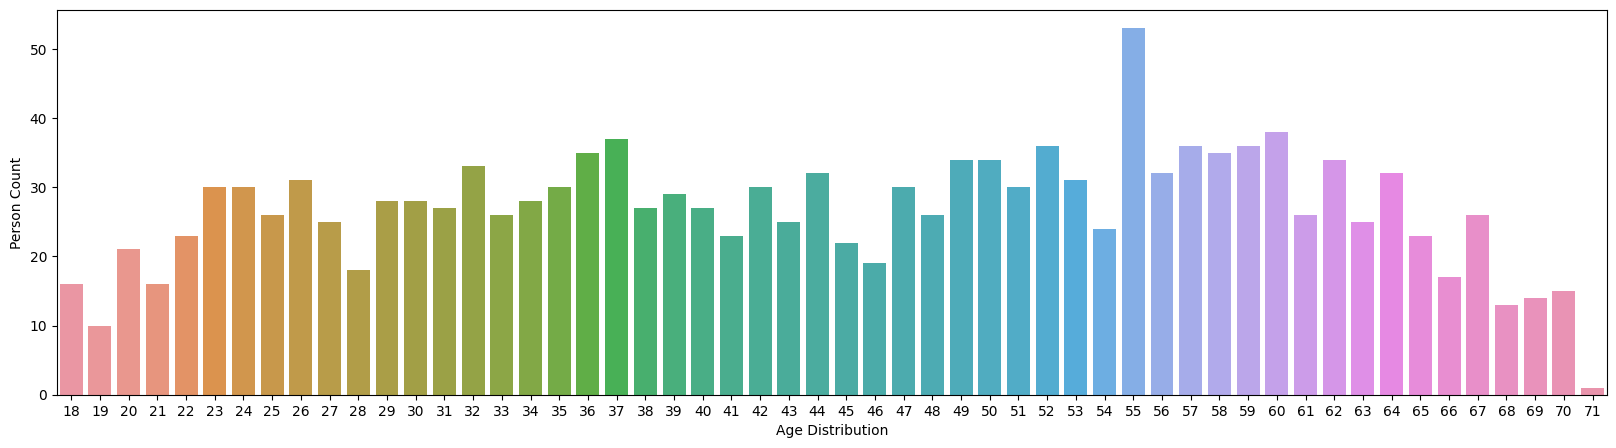

In [24]:
plt.figure(figsize=(20,5))
sns.countplot(x=data['Age'])
plt.xlabel("Age Distribution")
plt.ylabel("Person Count")
plt.show()

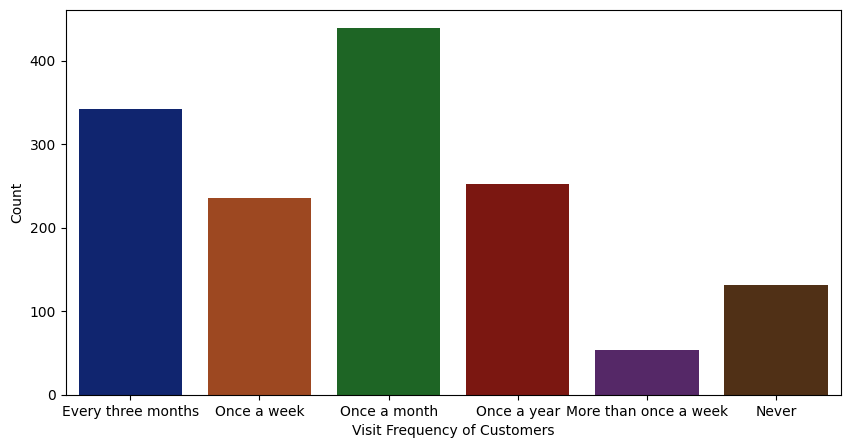

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['VisitFrequency'],palette="dark")
plt.xlabel("Visit Frequency of Customers")
plt.ylabel("Count")
plt.show()

In [26]:
data.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [27]:
le = LabelEncoder()

cols=["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
    
for i in cols:
    data[i] = le.fit_transform(data[i])

array([[<Axes: title={'center': 'yummy'}>,
        <Axes: title={'center': 'convenient'}>,
        <Axes: title={'center': 'spicy'}>],
       [<Axes: title={'center': 'fattening'}>,
        <Axes: title={'center': 'greasy'}>,
        <Axes: title={'center': 'fast'}>],
       [<Axes: title={'center': 'cheap'}>,
        <Axes: title={'center': 'tasty'}>,
        <Axes: title={'center': 'expensive'}>],
       [<Axes: title={'center': 'healthy'}>,
        <Axes: title={'center': 'disgusting'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

<Figure size 2500x2500 with 0 Axes>

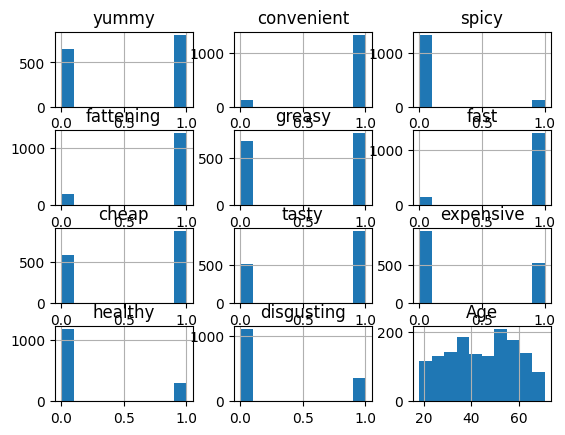

In [28]:
plt.figure(figsize=(25,25))
data.hist()

In [29]:
x = data.loc[:, cols]
x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [30]:
scaled_data = preprocessing.scale(x)

# Perform PCA with 11 components
pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_data)

# Define column names for the principal components
names = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10", "pc11"]

# Create a pandas DataFrame for the principal components
pc_dataframe = pd.DataFrame(data=principal_components, columns=names)

# Display the DataFrame
pc_dataframe

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144
...,...,...,...,...,...,...,...,...,...,...,...
1448,3.499105,1.069999,0.148971,-0.195977,0.787923,1.016536,-1.977414,0.049487,-0.964269,0.070579,0.155016
1449,-1.568786,0.899328,1.192503,-0.286497,2.234500,1.258306,-1.764159,-1.705500,-0.232987,-0.036497,0.039392
1450,-0.414275,1.810438,-1.071948,-0.901031,-0.750299,0.065975,0.720962,-0.397984,-0.344847,0.098558,0.118205
1451,-2.803630,0.562759,2.278887,0.083924,0.080147,-0.969368,-0.384558,0.604123,-0.211434,0.083127,0.077614


In [31]:
std_dev = np.std(principal_components, axis=0)
print("Standard Deviation :\n", std_dev)


Standard Deviation :
 [1.67667232 1.27742861 1.17480209 1.03969553 0.95828971 0.88430832
 0.84548297 0.76960542 0.72381556 0.55461848 0.50680804]


In [32]:
# Get the proportion of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the proportion of variance for each principal component
print("Proportion of Variance : \n", explained_variance_ratio)

Proportion of Variance : 
 [0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]


In [33]:
# Calculate the cumulative proportion of variance explained by the principal components
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Print the cumulative proportion of variance for each principal component
print("Cumulative Proportion : \n", cumulative_variance_ratio)

Cumulative Proportion : 
 [0.25556637 0.40391399 0.52938308 0.62765279 0.71113635 0.78222737
 0.84721295 0.90105773 0.94868581 0.9766496  1.        ]


In [34]:
# Get the principal components and number of features
principal_components = pca.components_
num_features = pca.n_features_

# Create a list of names for the principal components
pc_names = ["PC" + str(i) for i in range(1, num_features + 1)]

# Create a DataFrame to store the loadings for each principal component
loadings_df = pd.DataFrame(data=principal_components.T, columns=pc_names)

# Display the DataFrame
loadings_df


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
1,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
2,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
3,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
4,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
5,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
6,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
7,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
8,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614
9,-0.266839,0.201031,0.367814,0.301990,0.051787,-0.446166,-0.449446,-0.446110,0.219269,-0.054544,-0.089903


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

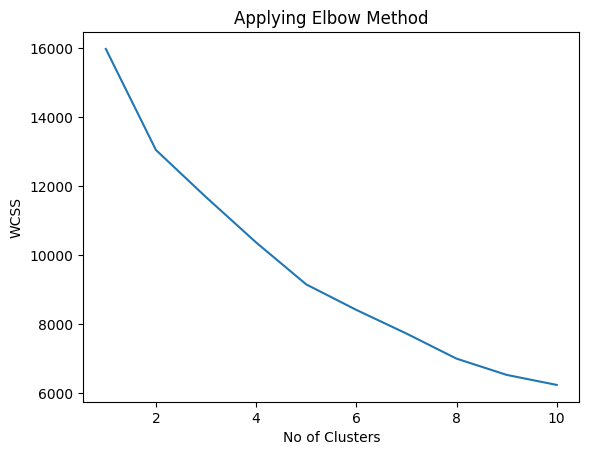

In [35]:
# Create an empty list to store the within-cluster sum of squares (WCSS) for each k value
wcss = []

# Calculate the WCSS for k values from 1 to 10 using the k-means algorithm
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(pc_dataframe)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title("Applying Elbow Method") 
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

In [36]:
# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(x)

# Add a column to the data DataFrame to store the cluster number for each data point
data['cluster_num'] = kmeans.labels_

# Print the cluster labels, within-cluster sum of squares (inertia), number of iterations, and cluster centers
print("Cluster labels:", kmeans.labels_)
print("Within-cluster sum of squares (inertia):", kmeans.inertia_)
print("Number of iterations:", kmeans.n_iter_)
print("Cluster centers:", kmeans.cluster_centers_)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [2 0 0 ... 0 1 3]
Within-cluster sum of squares (inertia): 1603.0604440558923
Number of iterations: 7
Cluster centers: [[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [37]:
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

In [38]:
# Calculate the correlation coefficients between the original variables and the principal components
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x.columns.values
loadings_df = loadings_df.set_index('variable')

# Print the resulting DataFrame
print(loadings_df)


                 PC1       PC2       PC3       PC4       PC5       PC6  \
variable                                                                 
yummy      -0.406955  0.282615 -0.259588  0.026237  0.346857 -0.124916   
convenient -0.308827 -0.045682 -0.317151 -0.009424 -0.437148  0.188966   
spicy      -0.023320  0.069982  0.020170  0.845496 -0.185551  0.438661   
fattening   0.177861 -0.205590 -0.608077 -0.023396  0.086934  0.107520   
greasy      0.267796 -0.136300 -0.389568  0.330854  0.343713 -0.278329   
fast       -0.213039 -0.282441 -0.211395  0.090363 -0.568939 -0.572734   
cheap      -0.289134 -0.575032  0.125157  0.114477  0.256981  0.020657   
tasty      -0.426115  0.242199 -0.269648  0.072691  0.286099 -0.053053   
expensive   0.290944  0.567528 -0.183298  0.035510 -0.207362 -0.171160   
healthy    -0.266839  0.201031  0.367814  0.301990  0.051787 -0.446166   
disgusting  0.410744 -0.143888  0.090299  0.235231  0.105843 -0.328041   

                 PC7       PC8       

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


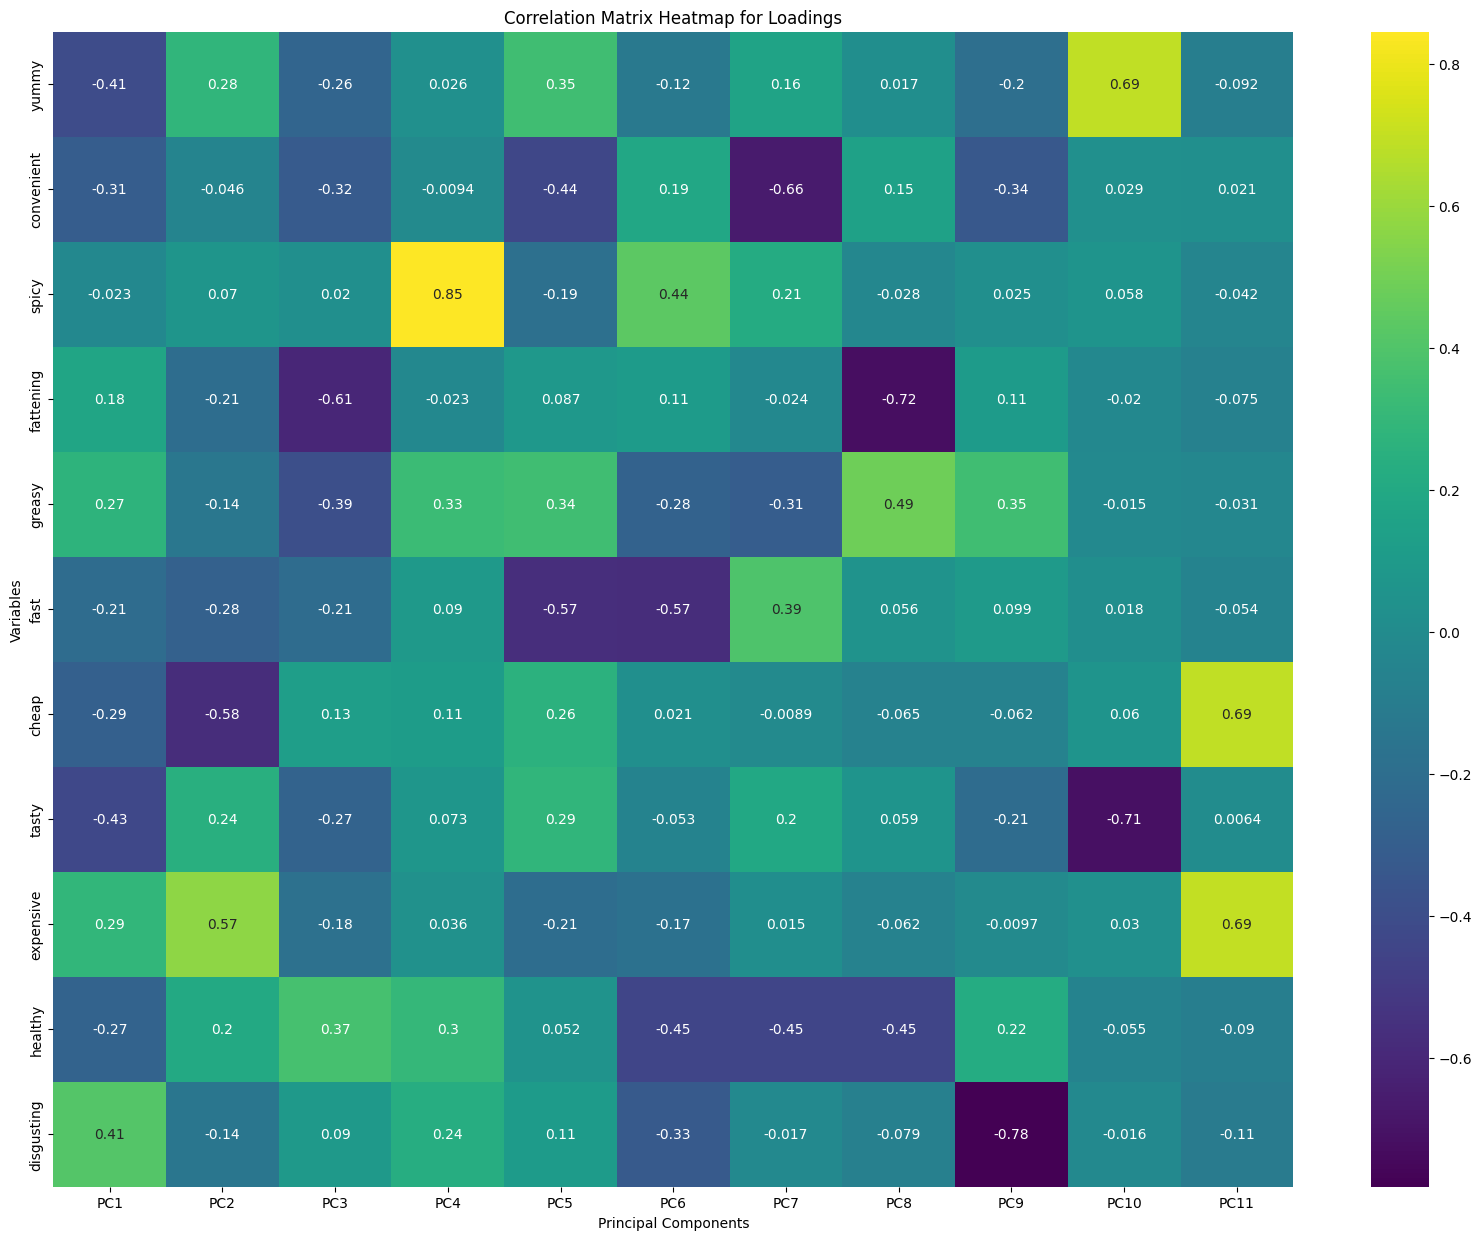

In [39]:
# Plot a correlation matrix heatmap for the loadings
plt.rcParams['figure.figsize'] = (20,15)
sns.heatmap(loadings_df, annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap for Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Variables')
plt.show()


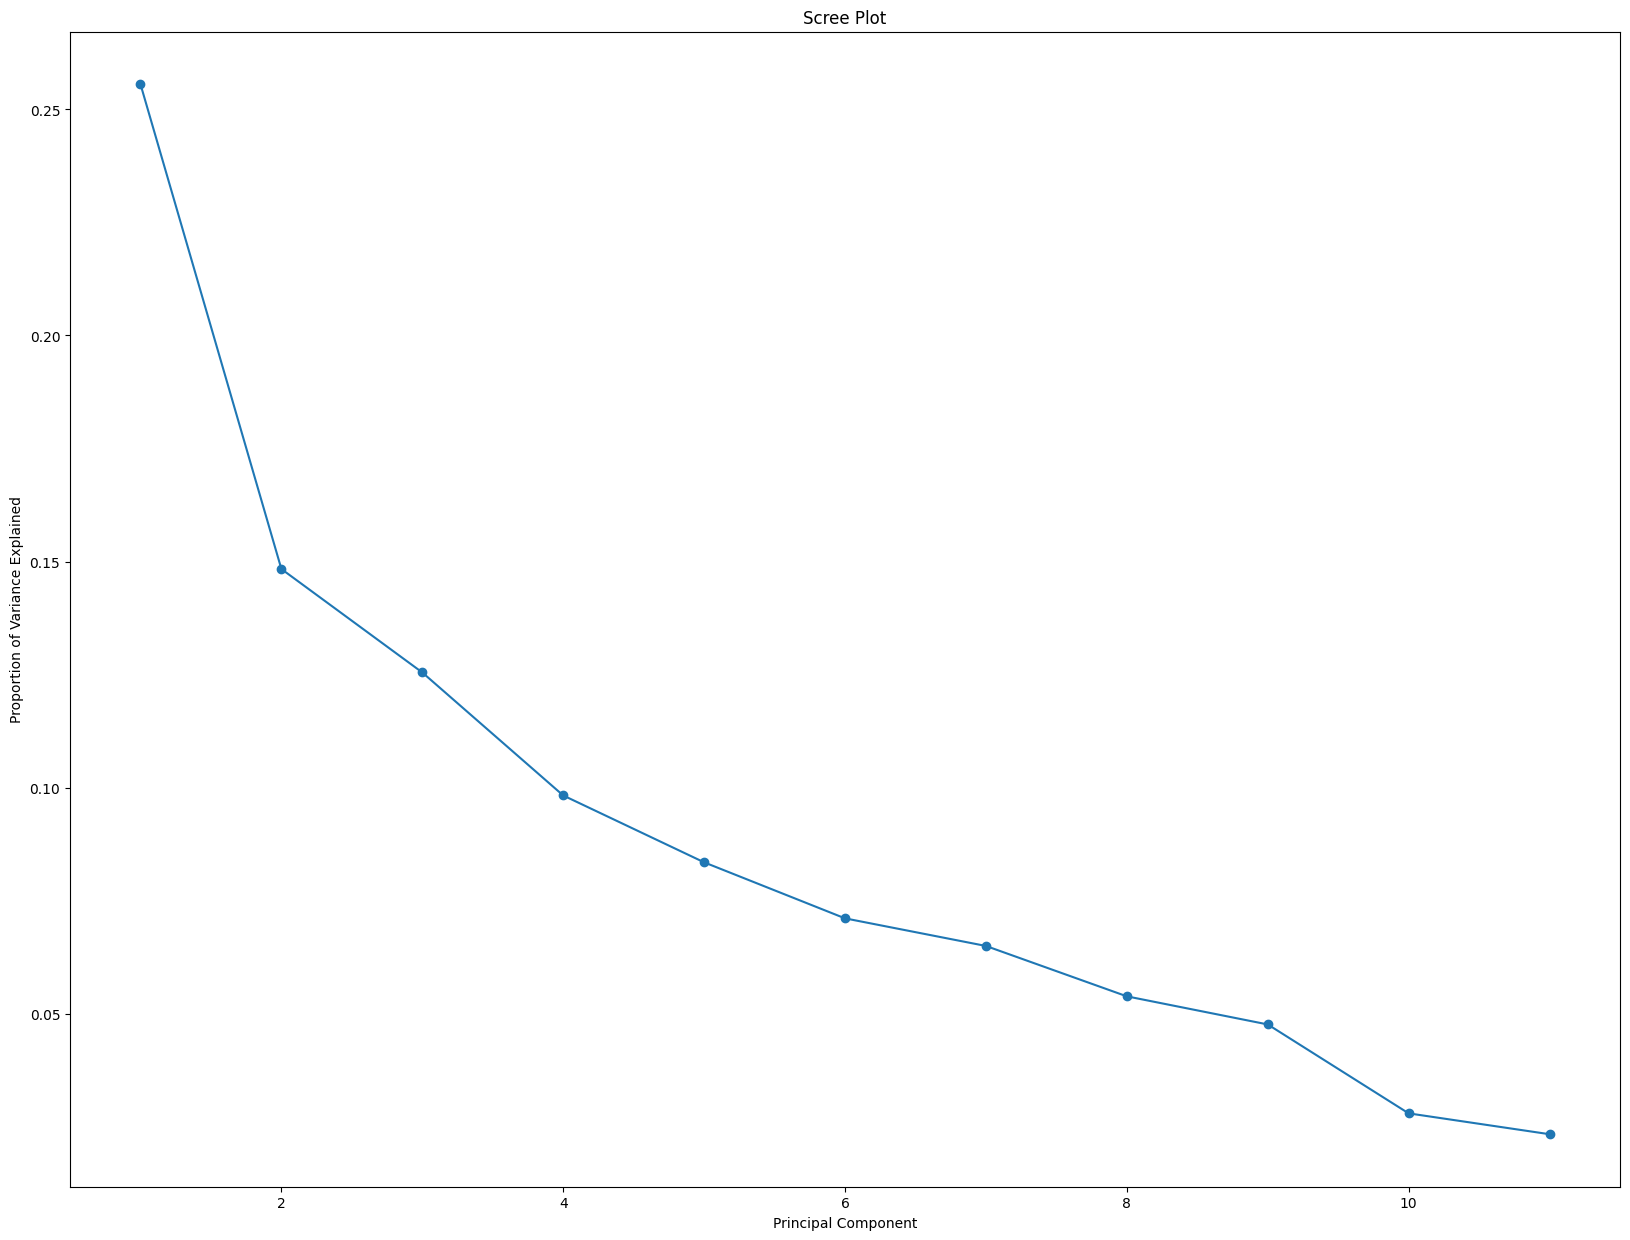

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [40]:
# Calculate and plot the scree plot for the principal components
plt.plot(range(1, num_pc + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

# Transform the data using PCA and get the principal component scores
pca_scores = pca.transform(x)


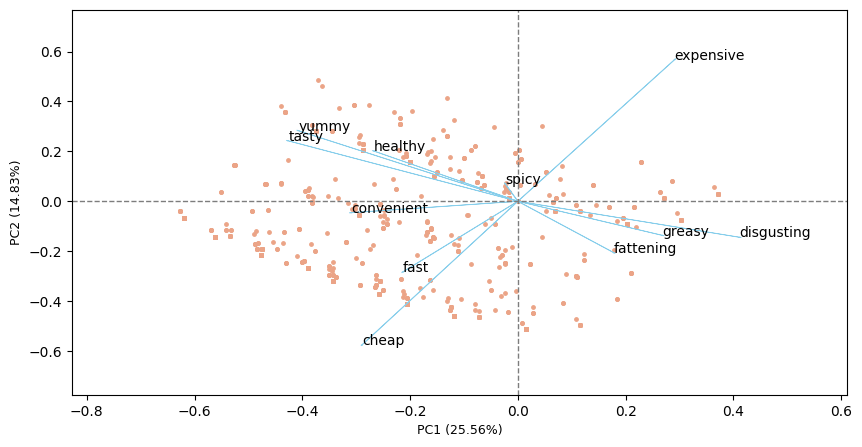

In [41]:

cluster.biplot(cscore = pca_scores, loadings = loadings, labels = data.columns.values, var1 = round(pca.explained_variance_ratio_[0]*100, 2),
    var2 = round(pca.explained_variance_ratio_[1] * 100, 2), show = True, dim = (10,5))

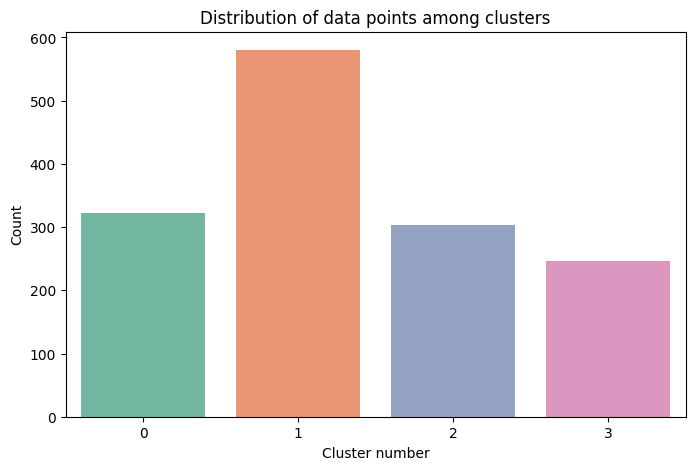

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(x = data["cluster_num"], palette = 'Set2')
plt.xlabel("Cluster number")
plt.ylabel("Count")
plt.title("Distribution of data points among clusters")
plt.show()

In [46]:
data_en = pd.get_dummies(data, prefix=['cluster'], columns=['cluster_num'])

In [48]:
data_en

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_0,cluster_1,cluster_2,cluster_3
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0,1,0,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,0,0,0,1
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,0,1,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,1,0,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,0,1,0,0


In [51]:
rs=[]
for i in cols:
    Gender = data.groupby(['cluster_num'])[i].mean()
    Gender = Gender.to_frame().reset_index()
    rs.append(Gender)

In [53]:
for i in range(len(rs)):
    print(pd.DataFrame(rs[i]))

   cluster_num     yummy
0            0  0.854489
1            1  0.887931
2            2  0.023026
3            3  0.020325
   cluster_num  convenient
0            0    0.962848
1            1    0.981034
2            2    0.891447
3            3    0.682927
   cluster_num     spicy
0            0  0.133127
1            1  0.086207
2            2  0.072368
3            3  0.085366
   cluster_num  fattening
0            0   0.907121
1            1   0.794828
2            2   0.924342
3            3   0.914634
   cluster_num    greasy
0            0  0.619195
1            1  0.329310
2            2  0.667763
3            3  0.695122
   cluster_num      fast
0            0  0.860681
1            1  0.960345
2            2  0.963816
3            3  0.731707
   cluster_num     cheap
0            0  0.108359
1            1  0.922414
2            2  0.934211
3            3  0.065041
   cluster_num     tasty
0            0  0.931889
1            1  0.975862
2            2  0.154605
3         

In [54]:
data_en = pd.get_dummies(data, prefix = ['VisitFrequency'], columns = ['VisitFrequency'])

In [55]:
data_en

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Like,Age,Gender,cluster_num,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,0,1,0,1,0,1,1,0,1,0,...,-3,61,Female,2,1,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,...,+2,51,Female,0,1,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,...,+1,62,Female,0,1,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,...,+4,69,Female,1,0,0,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,...,+2,49,Male,2,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,...,I hate it!-5,47,Male,3,0,0,0,0,0,1
1449,1,1,0,1,0,0,1,1,0,1,...,+2,36,Female,1,0,0,0,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,...,+3,52,Female,0,0,0,0,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,...,+4,41,Male,1,1,0,0,0,0,0


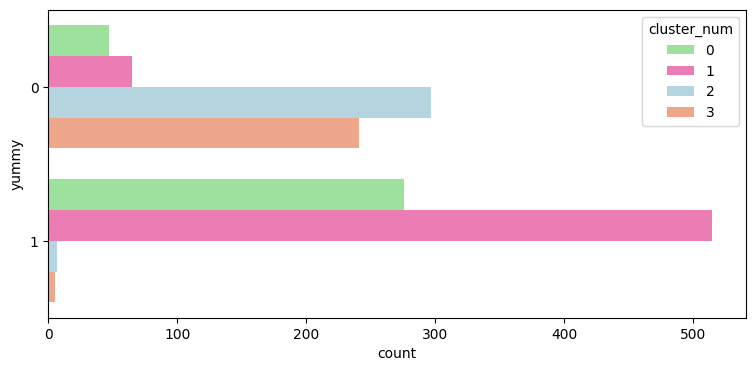

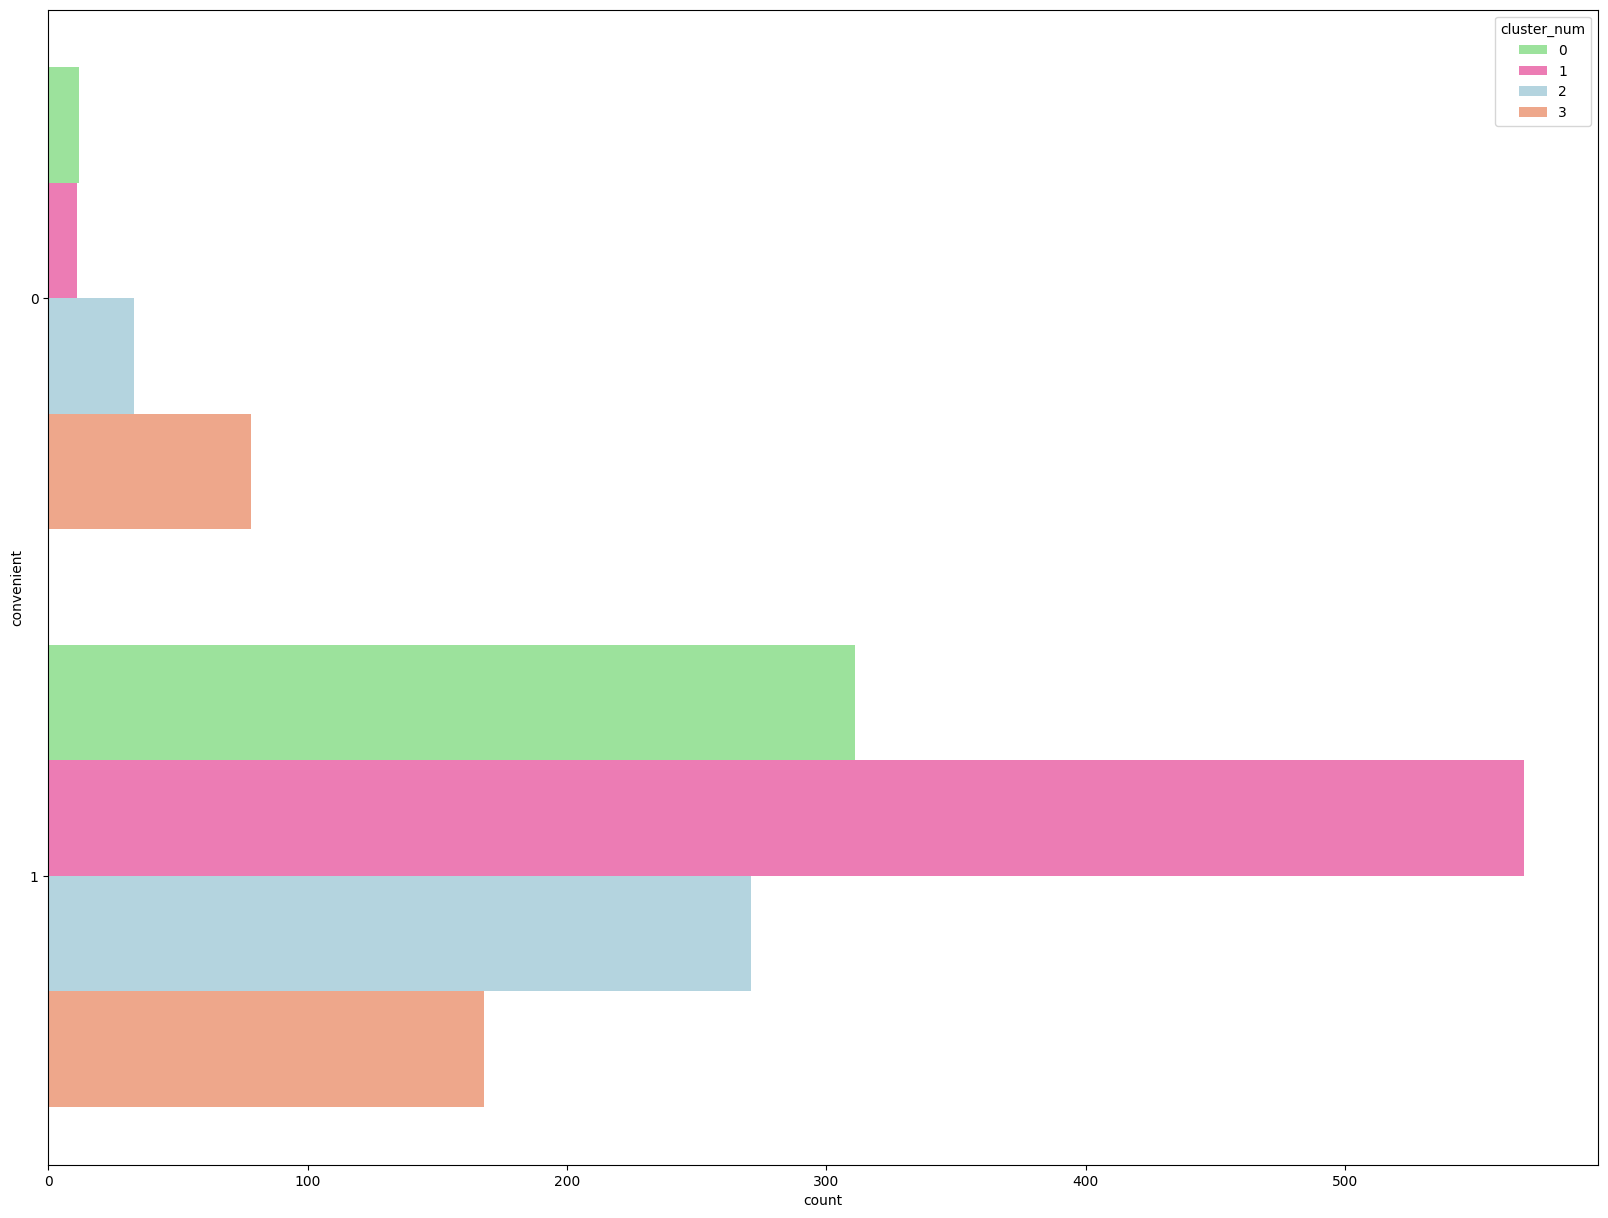

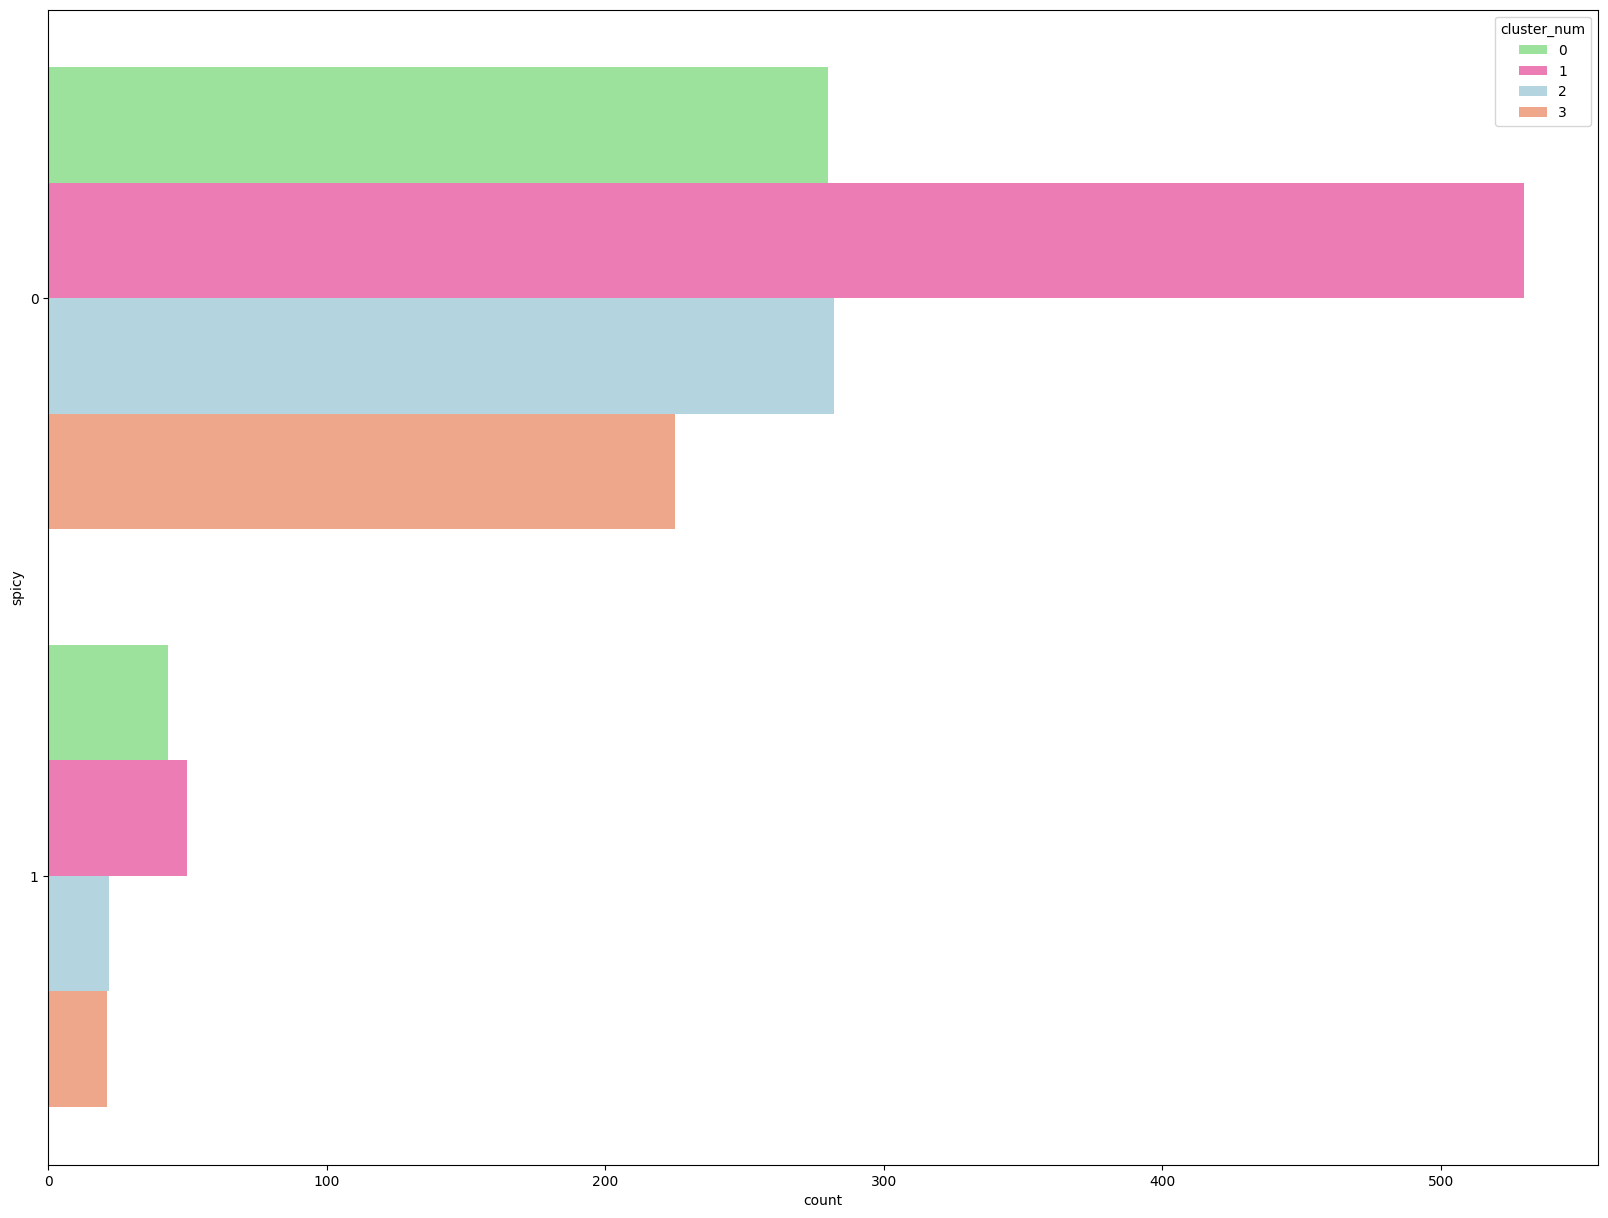

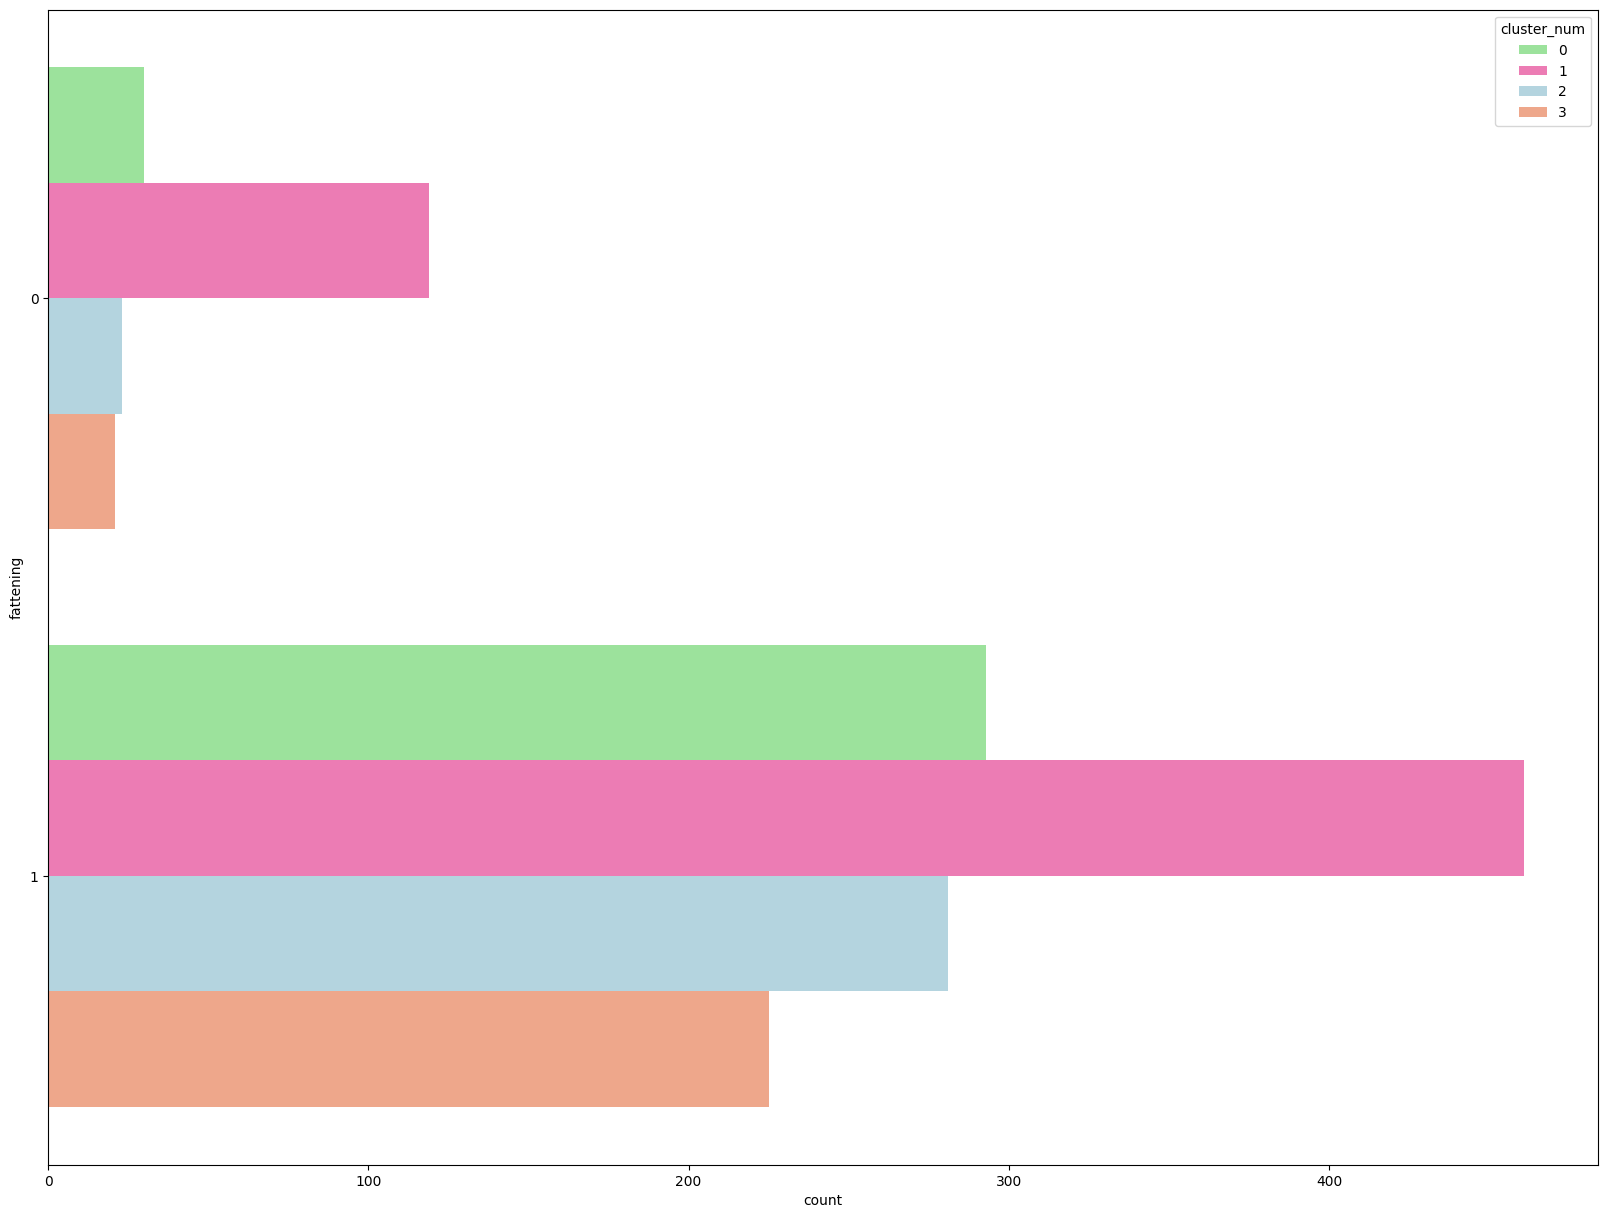

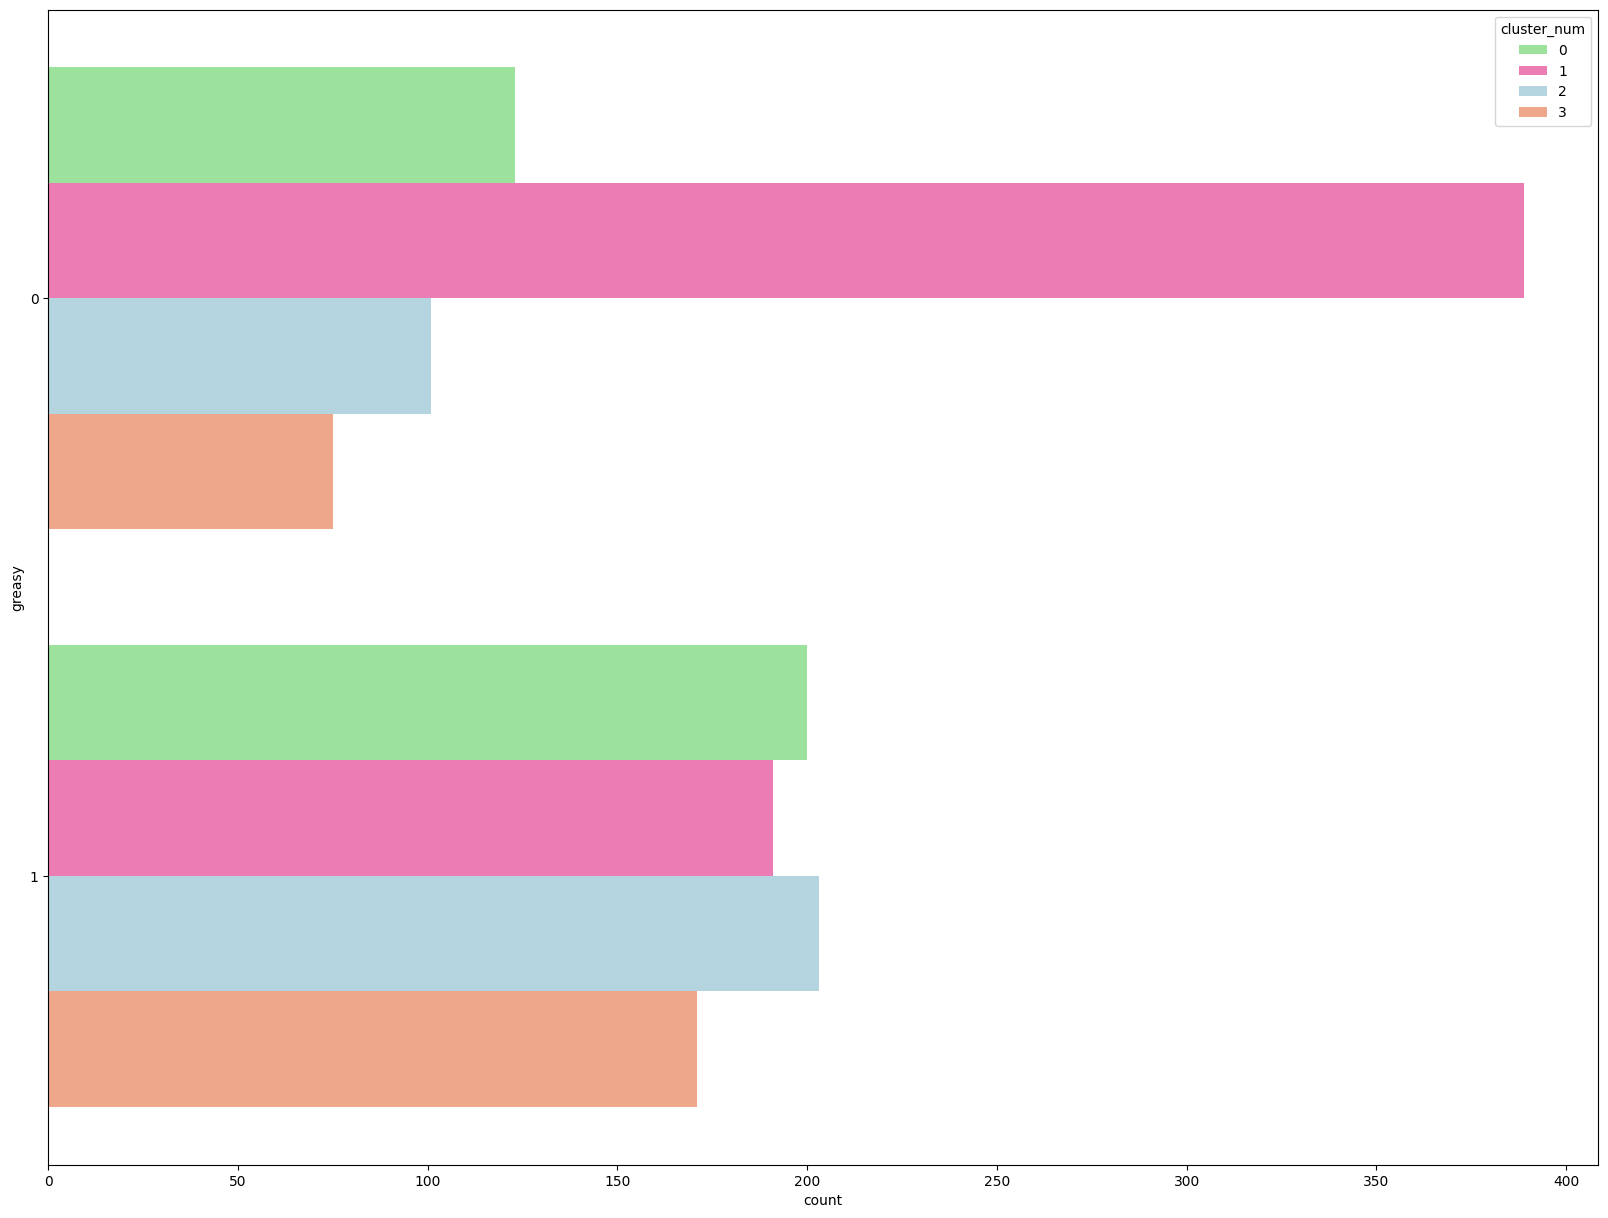

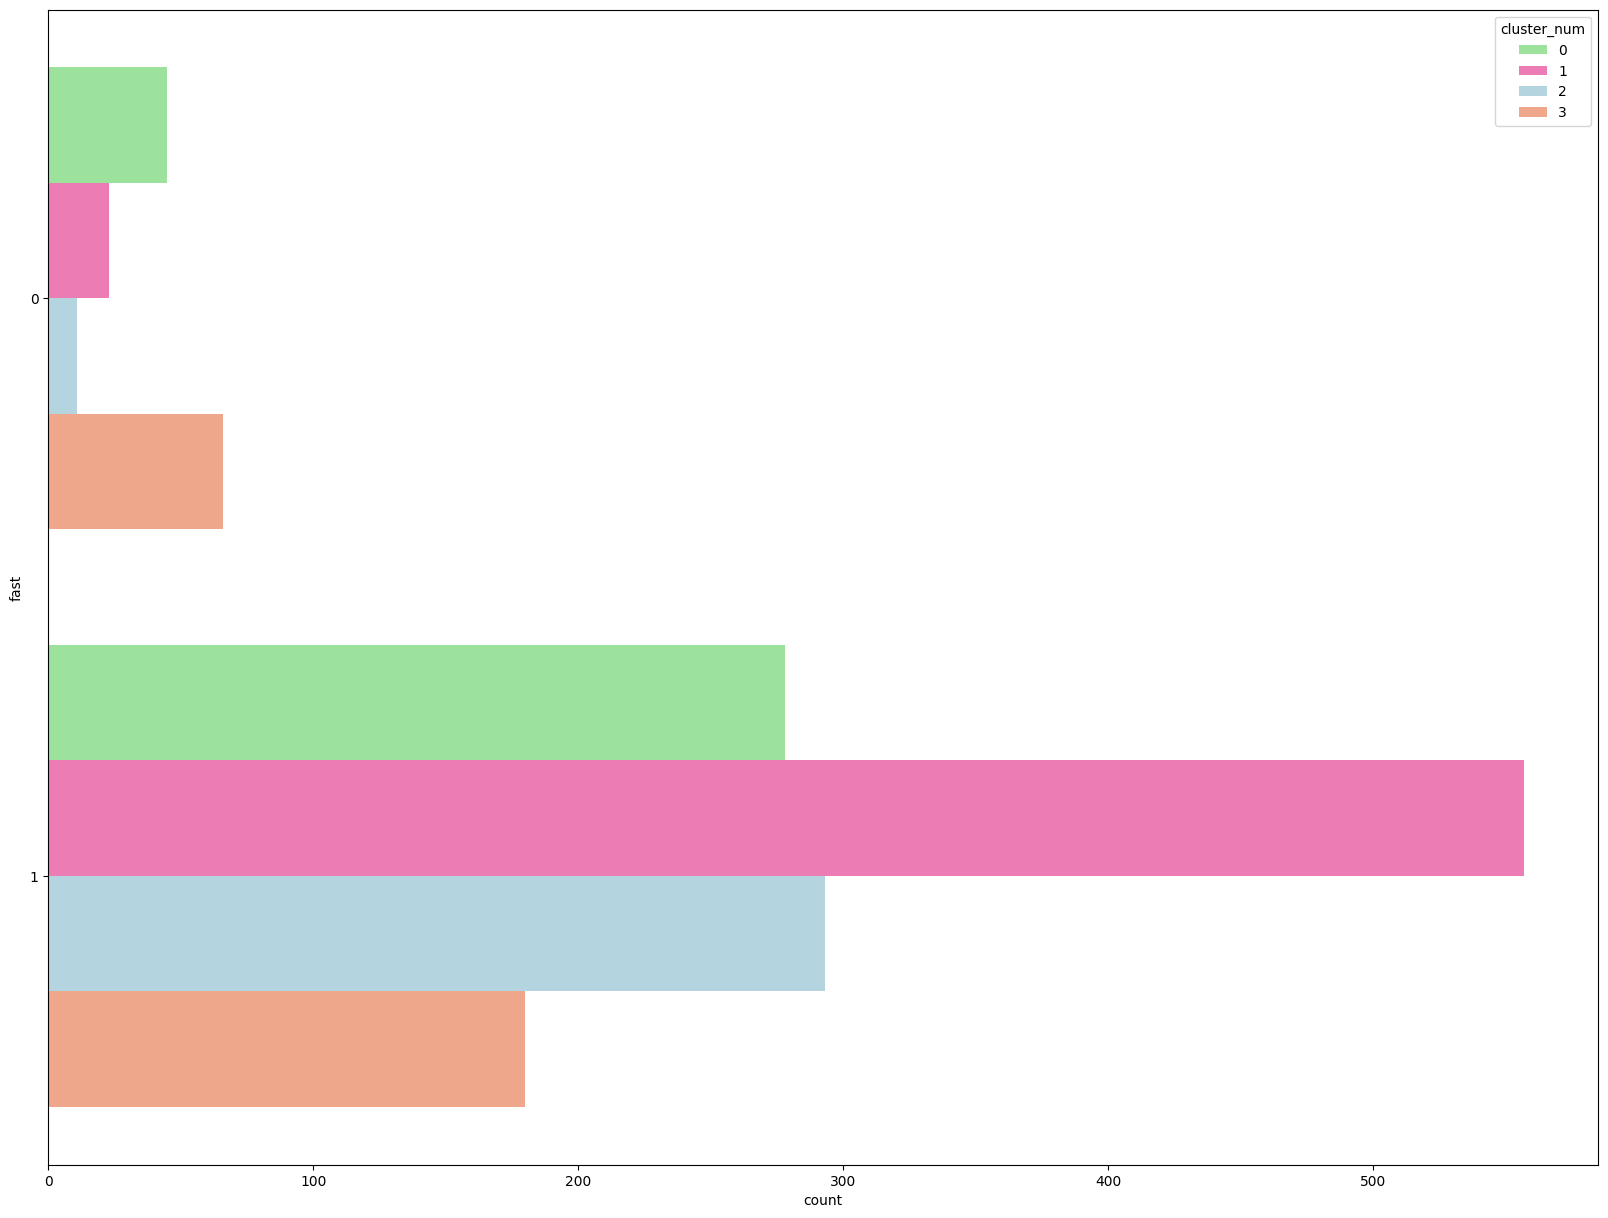

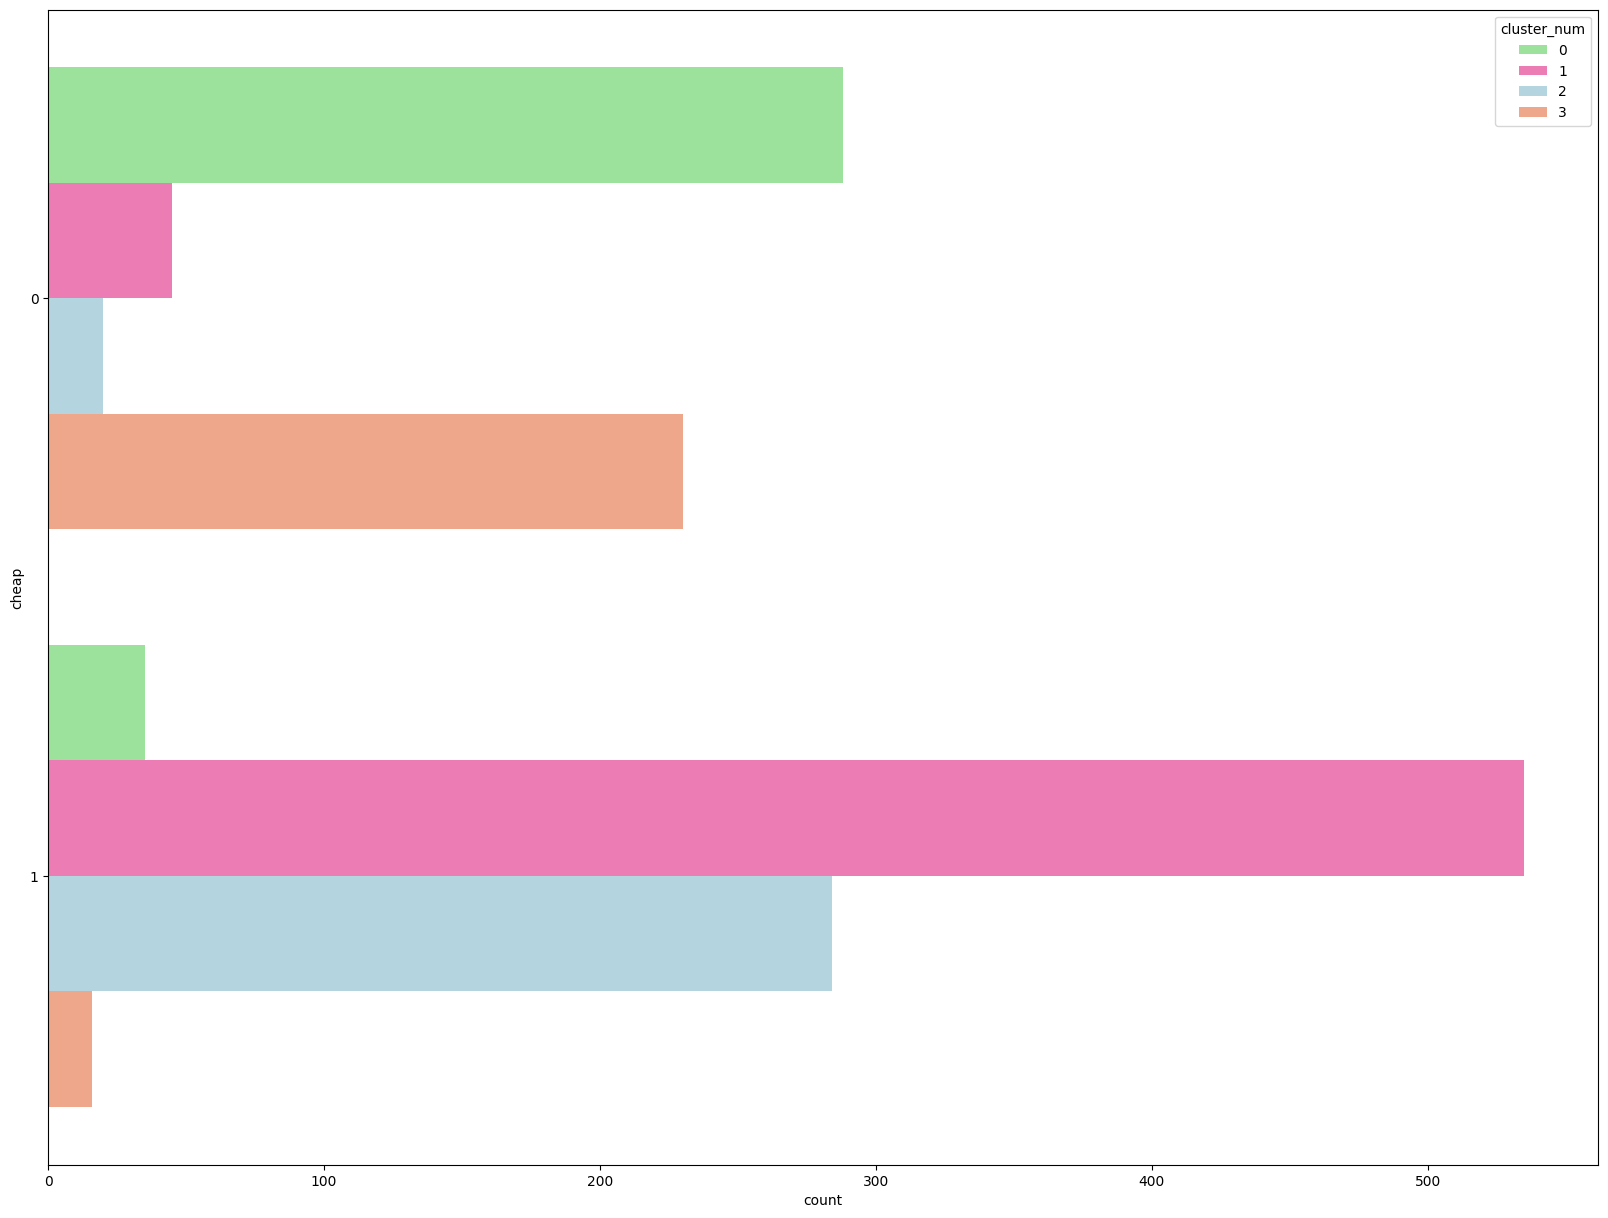

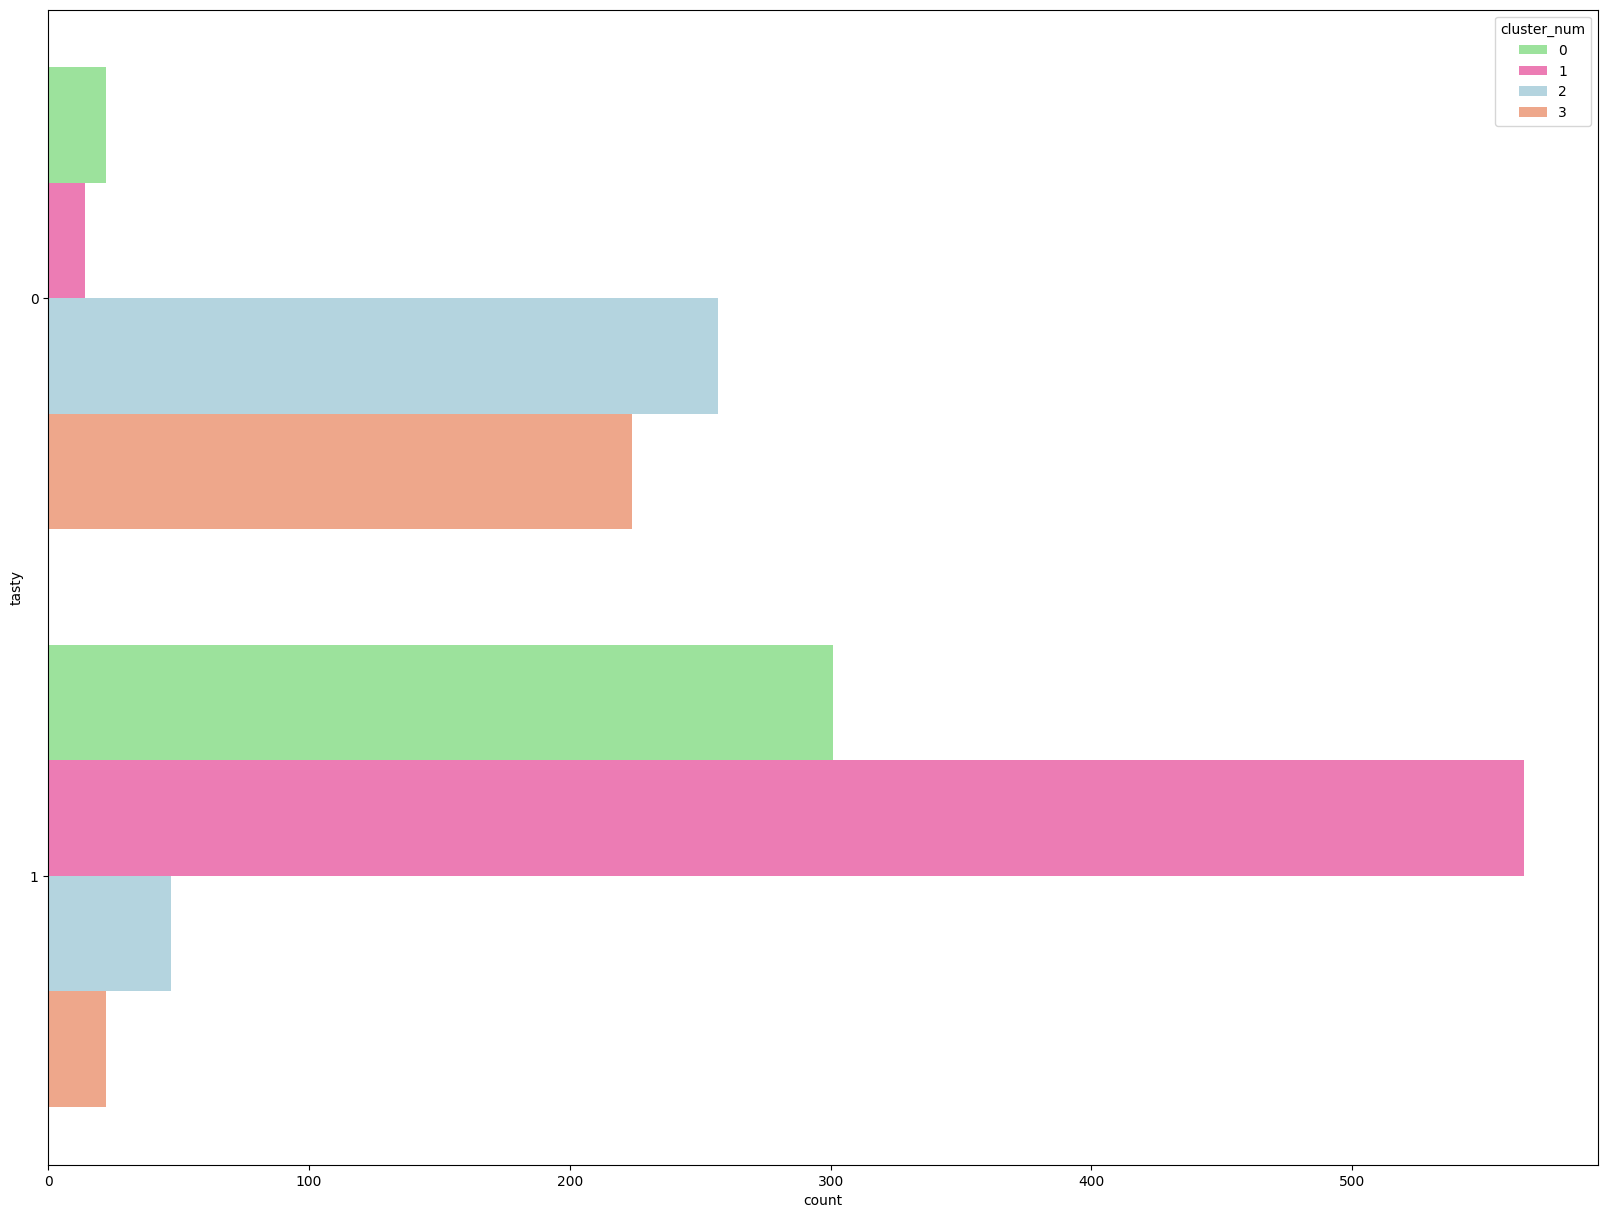

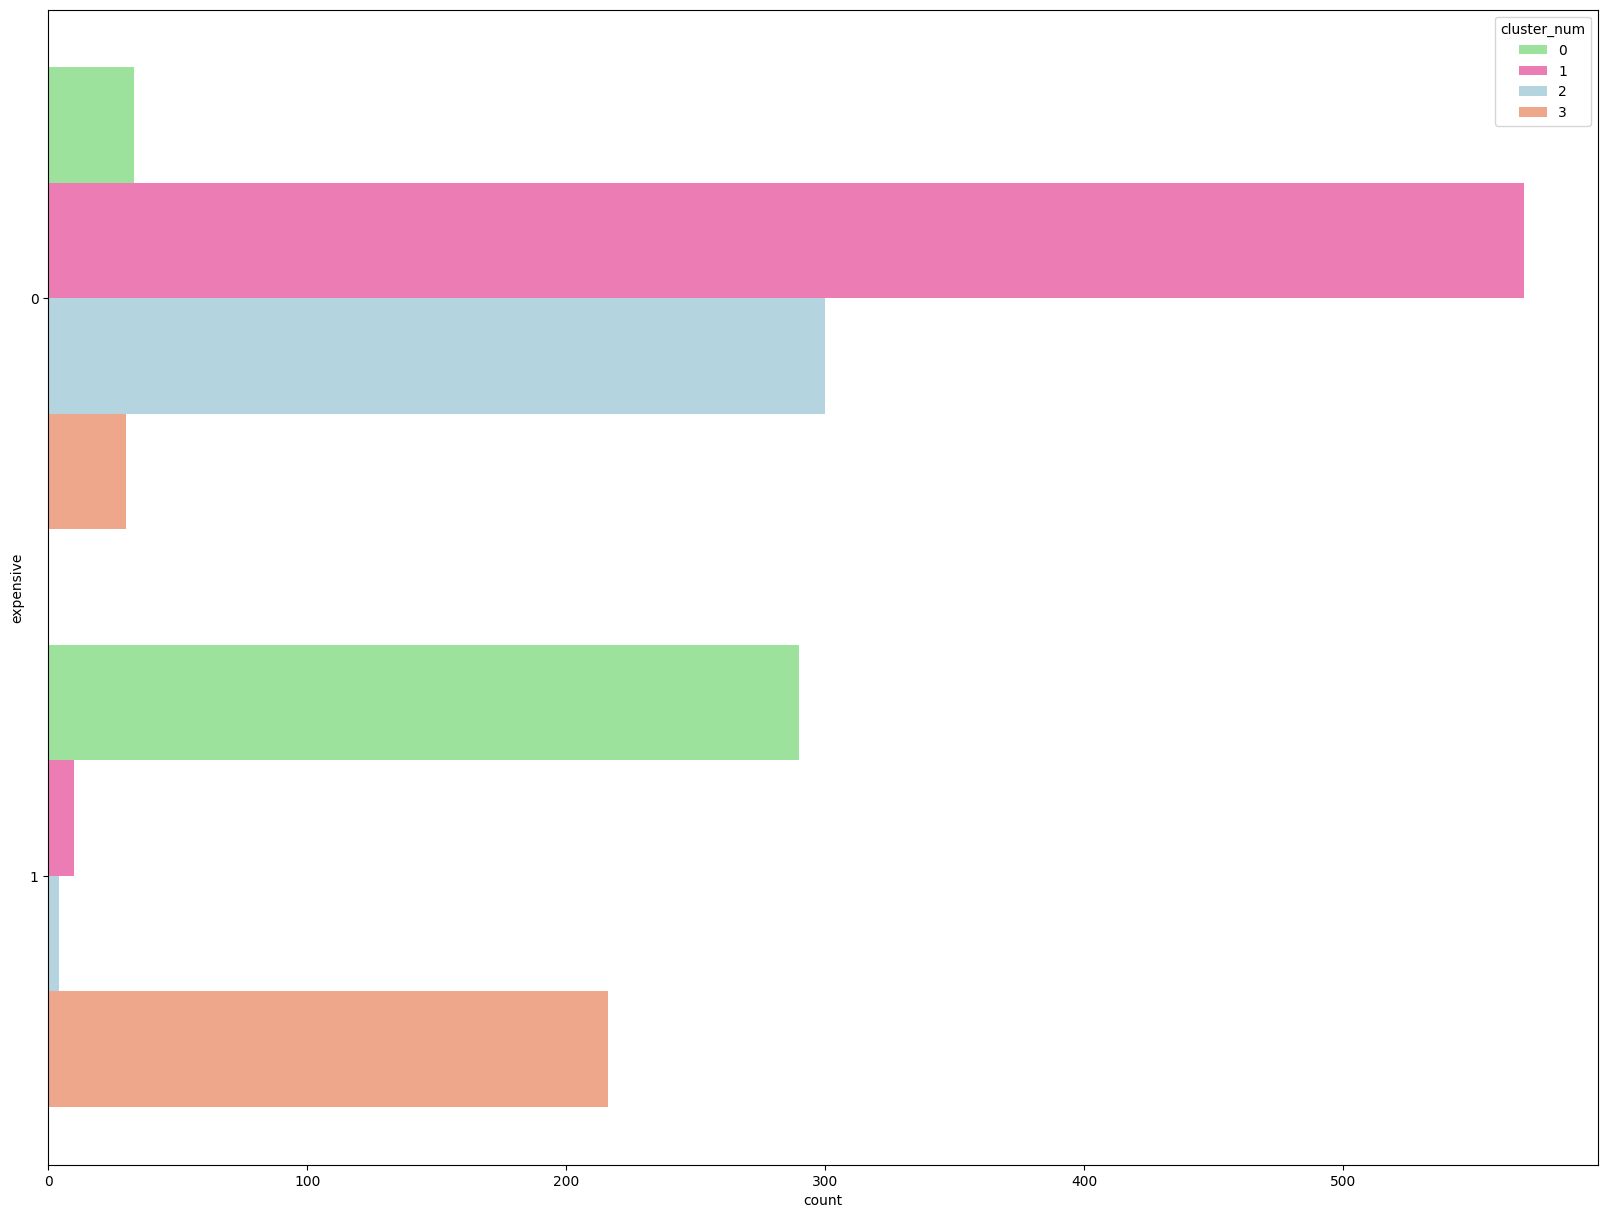

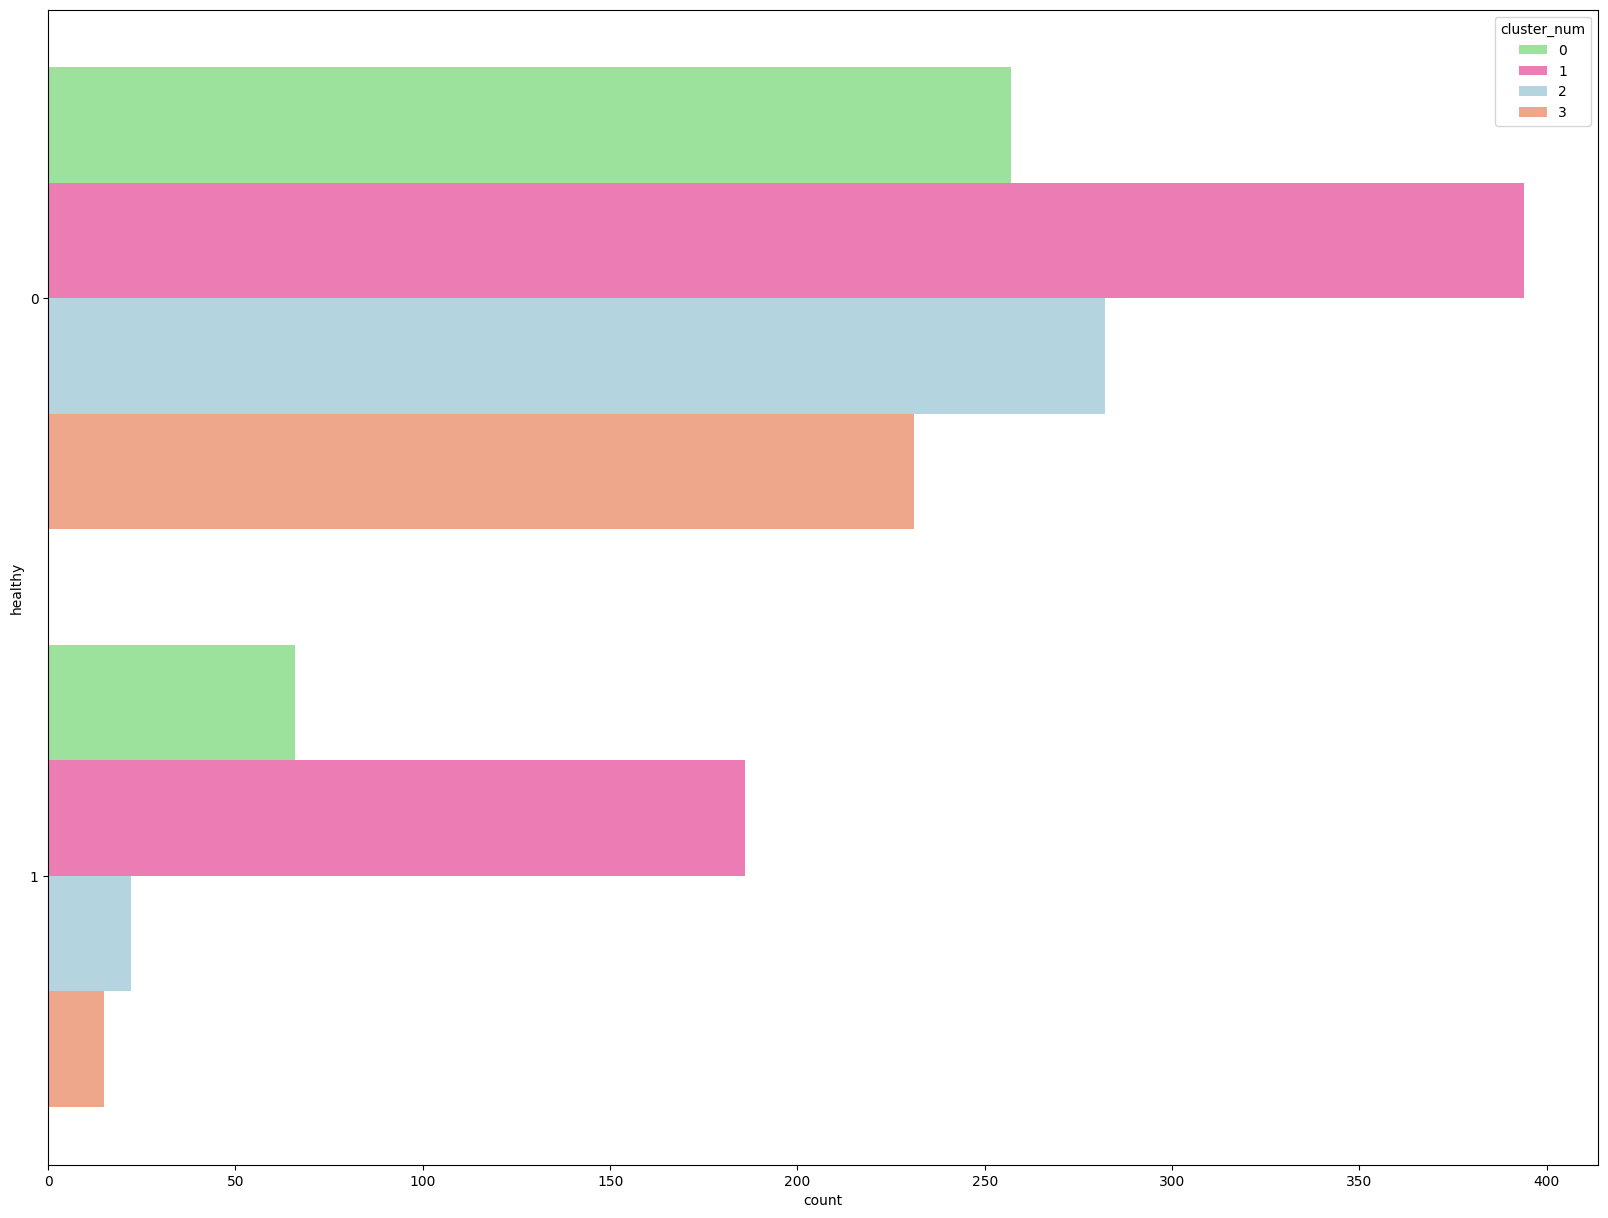

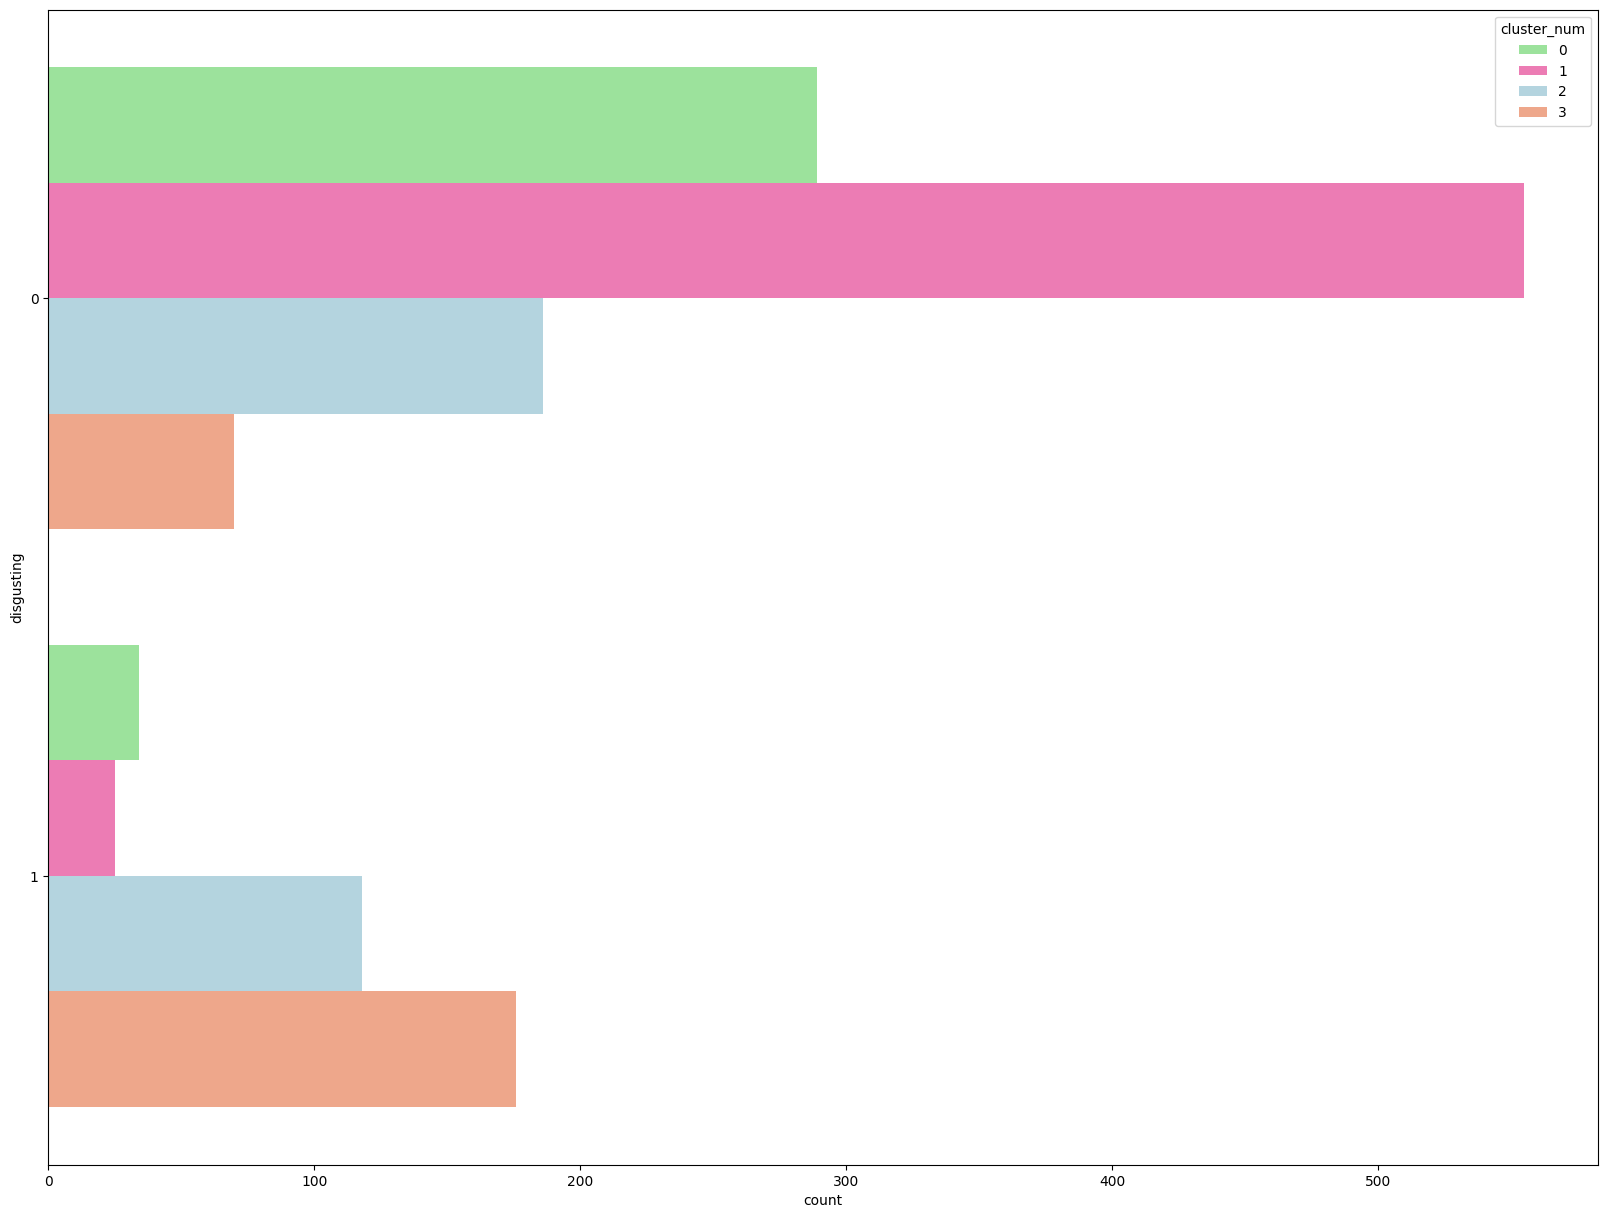

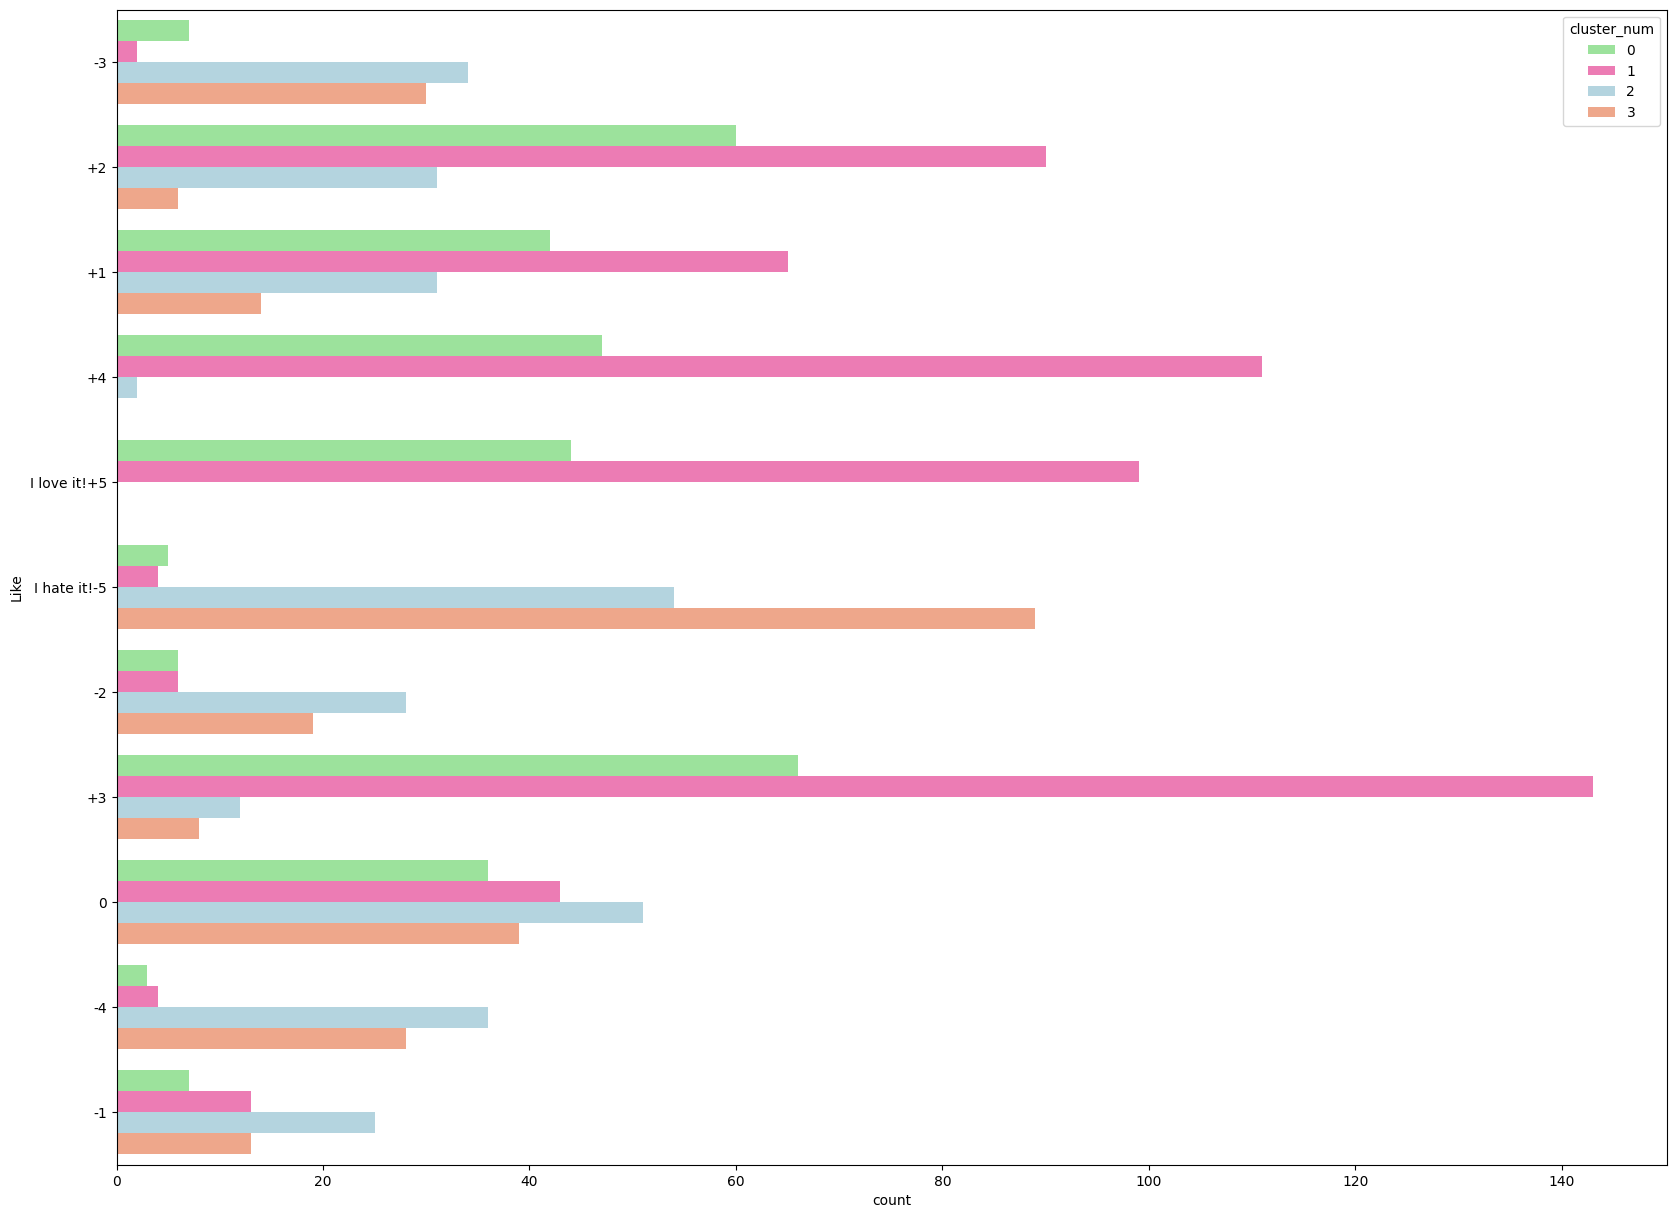

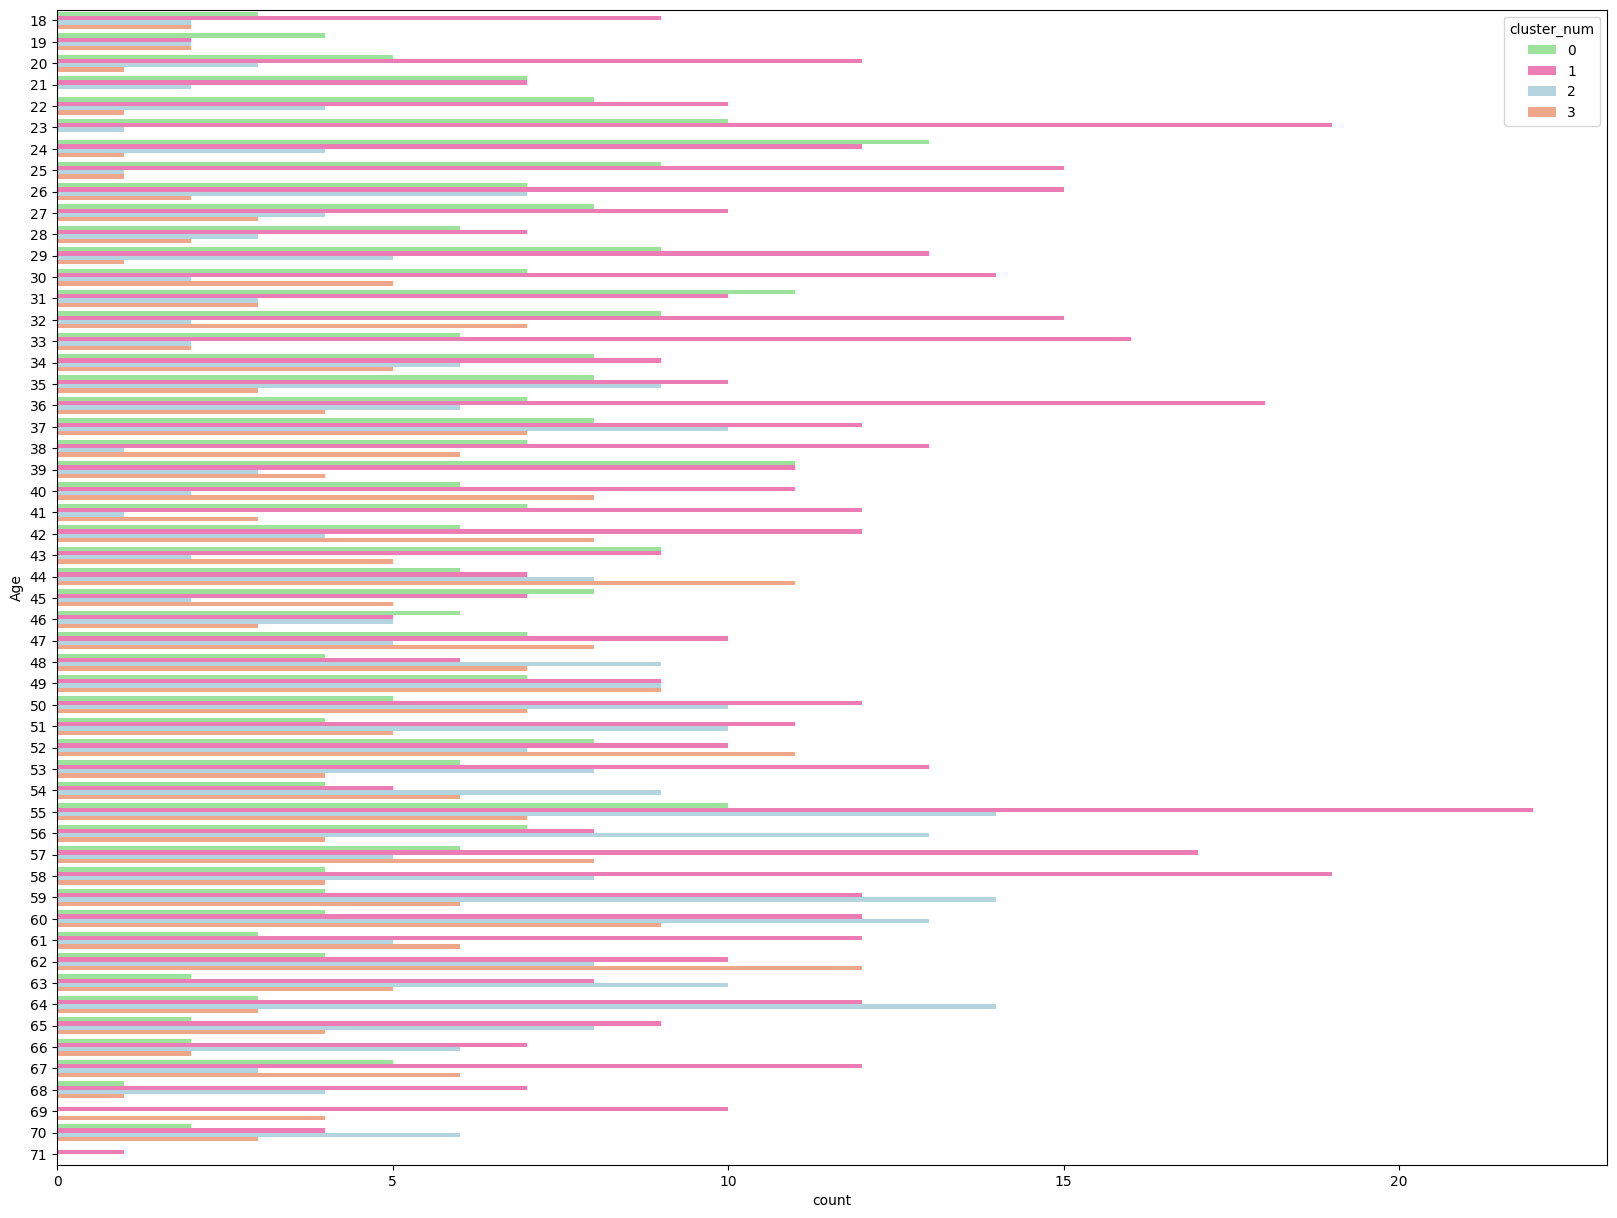

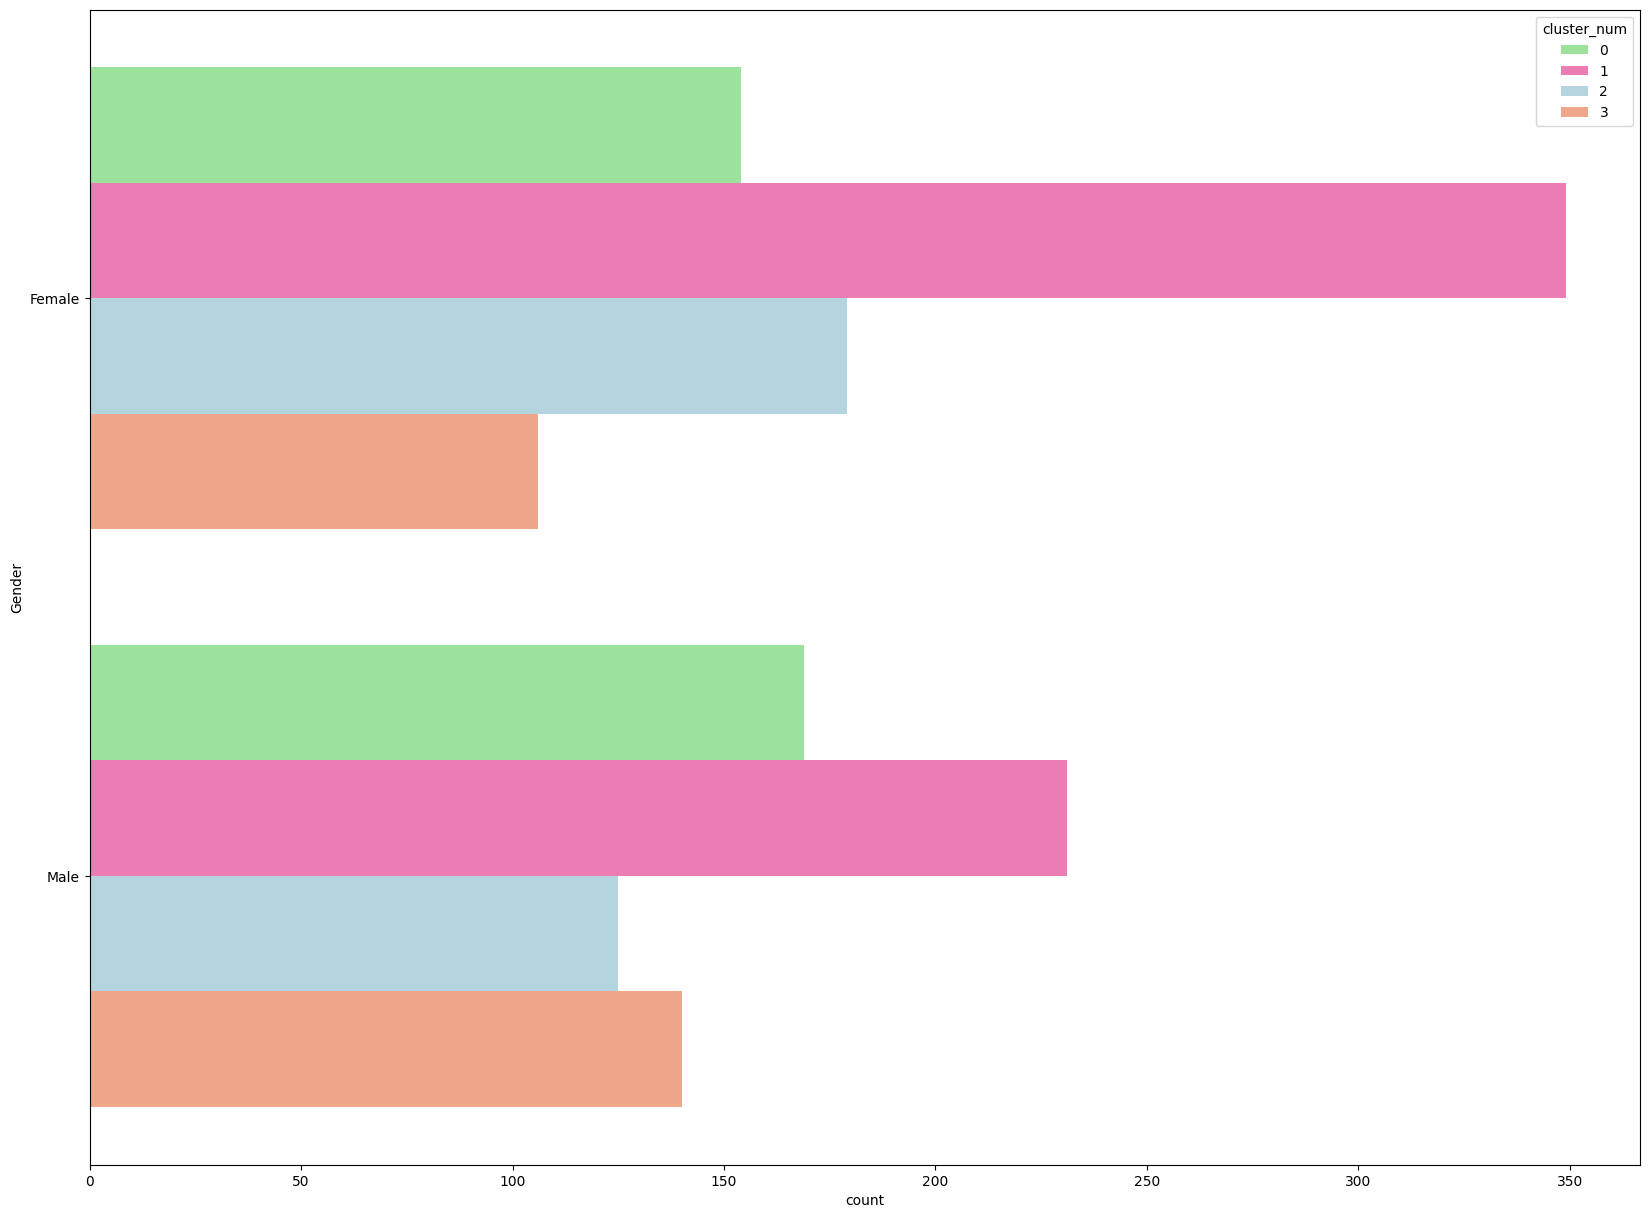

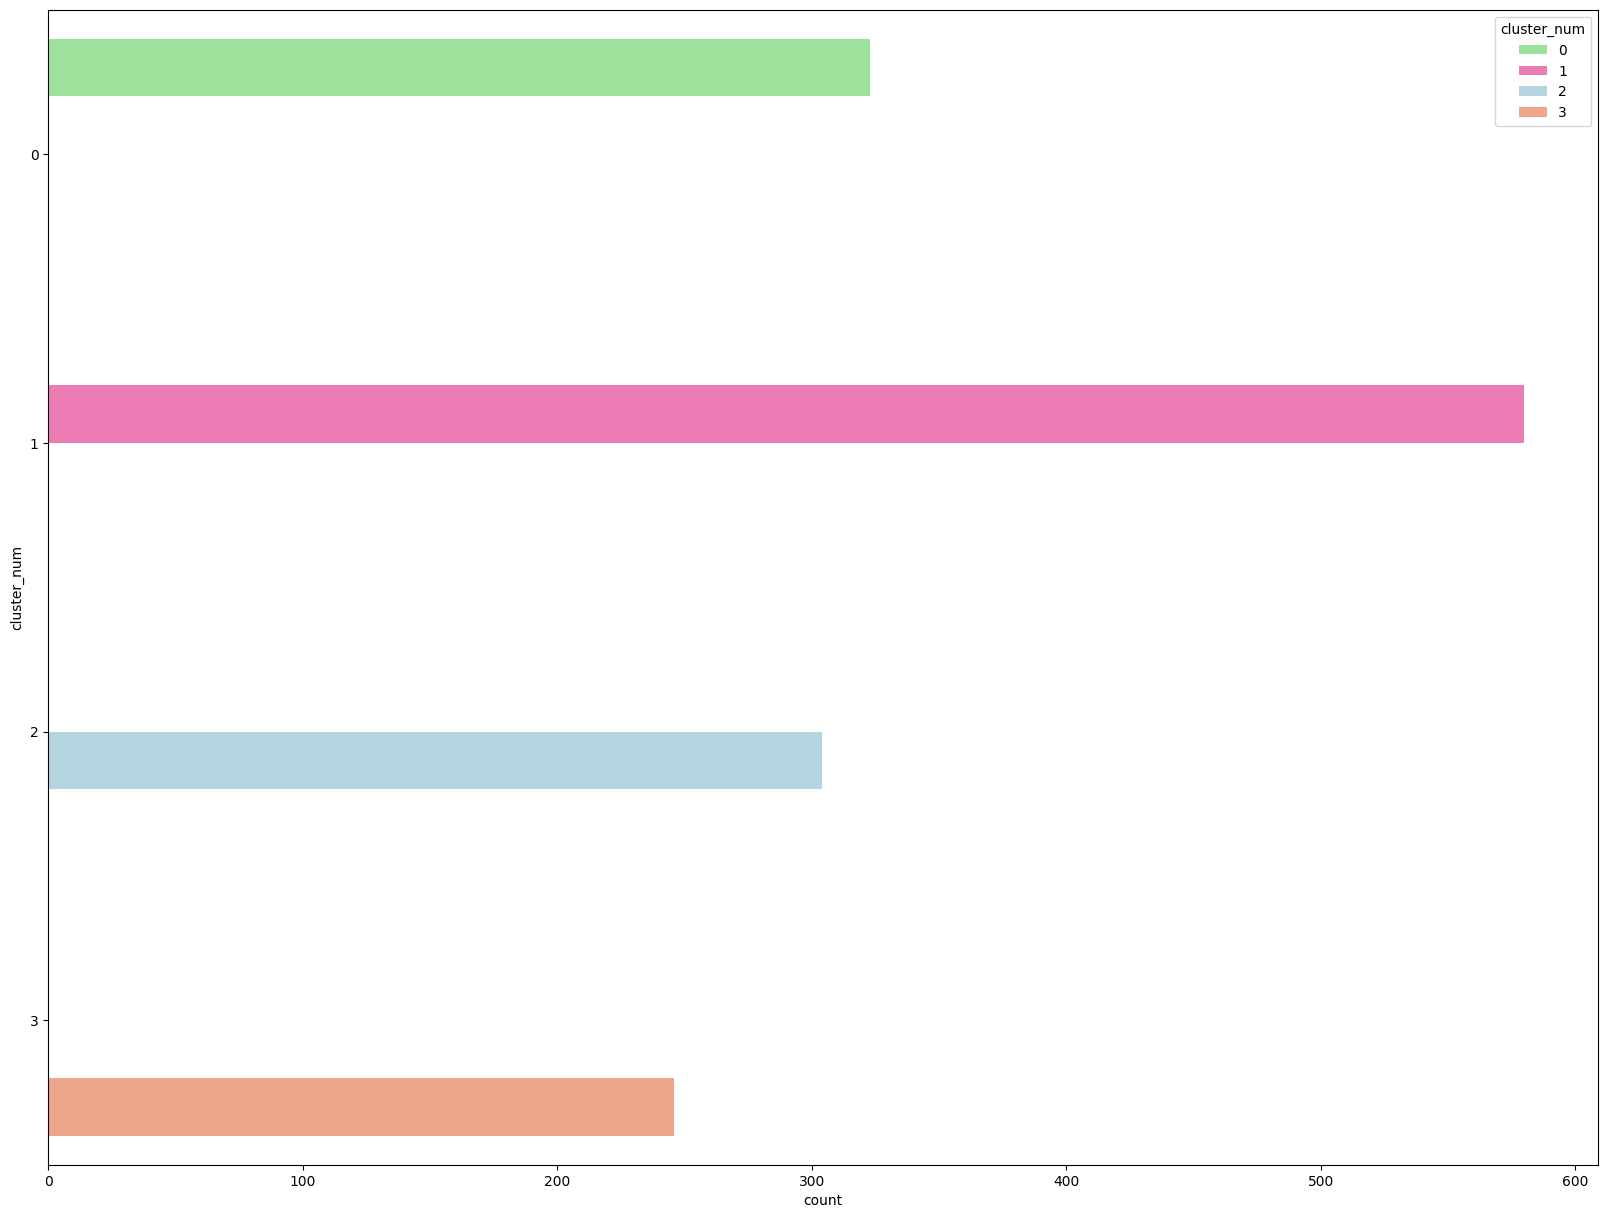

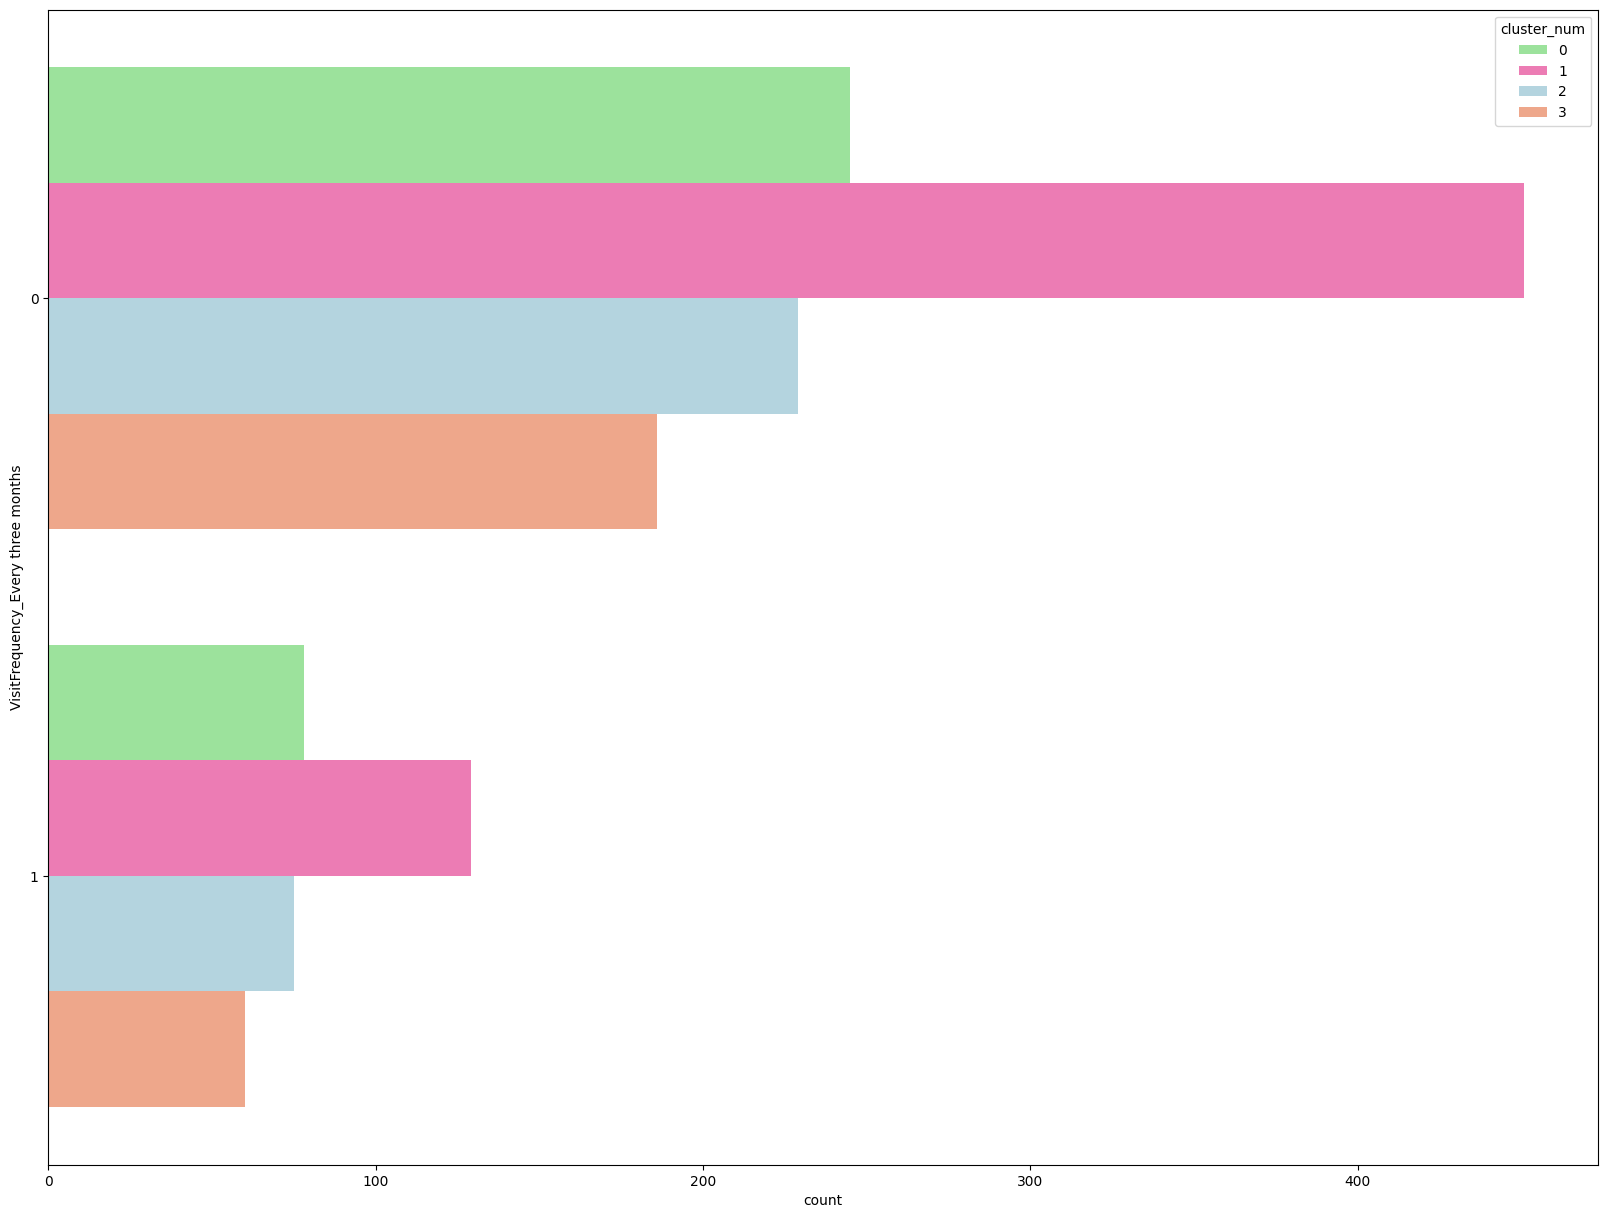

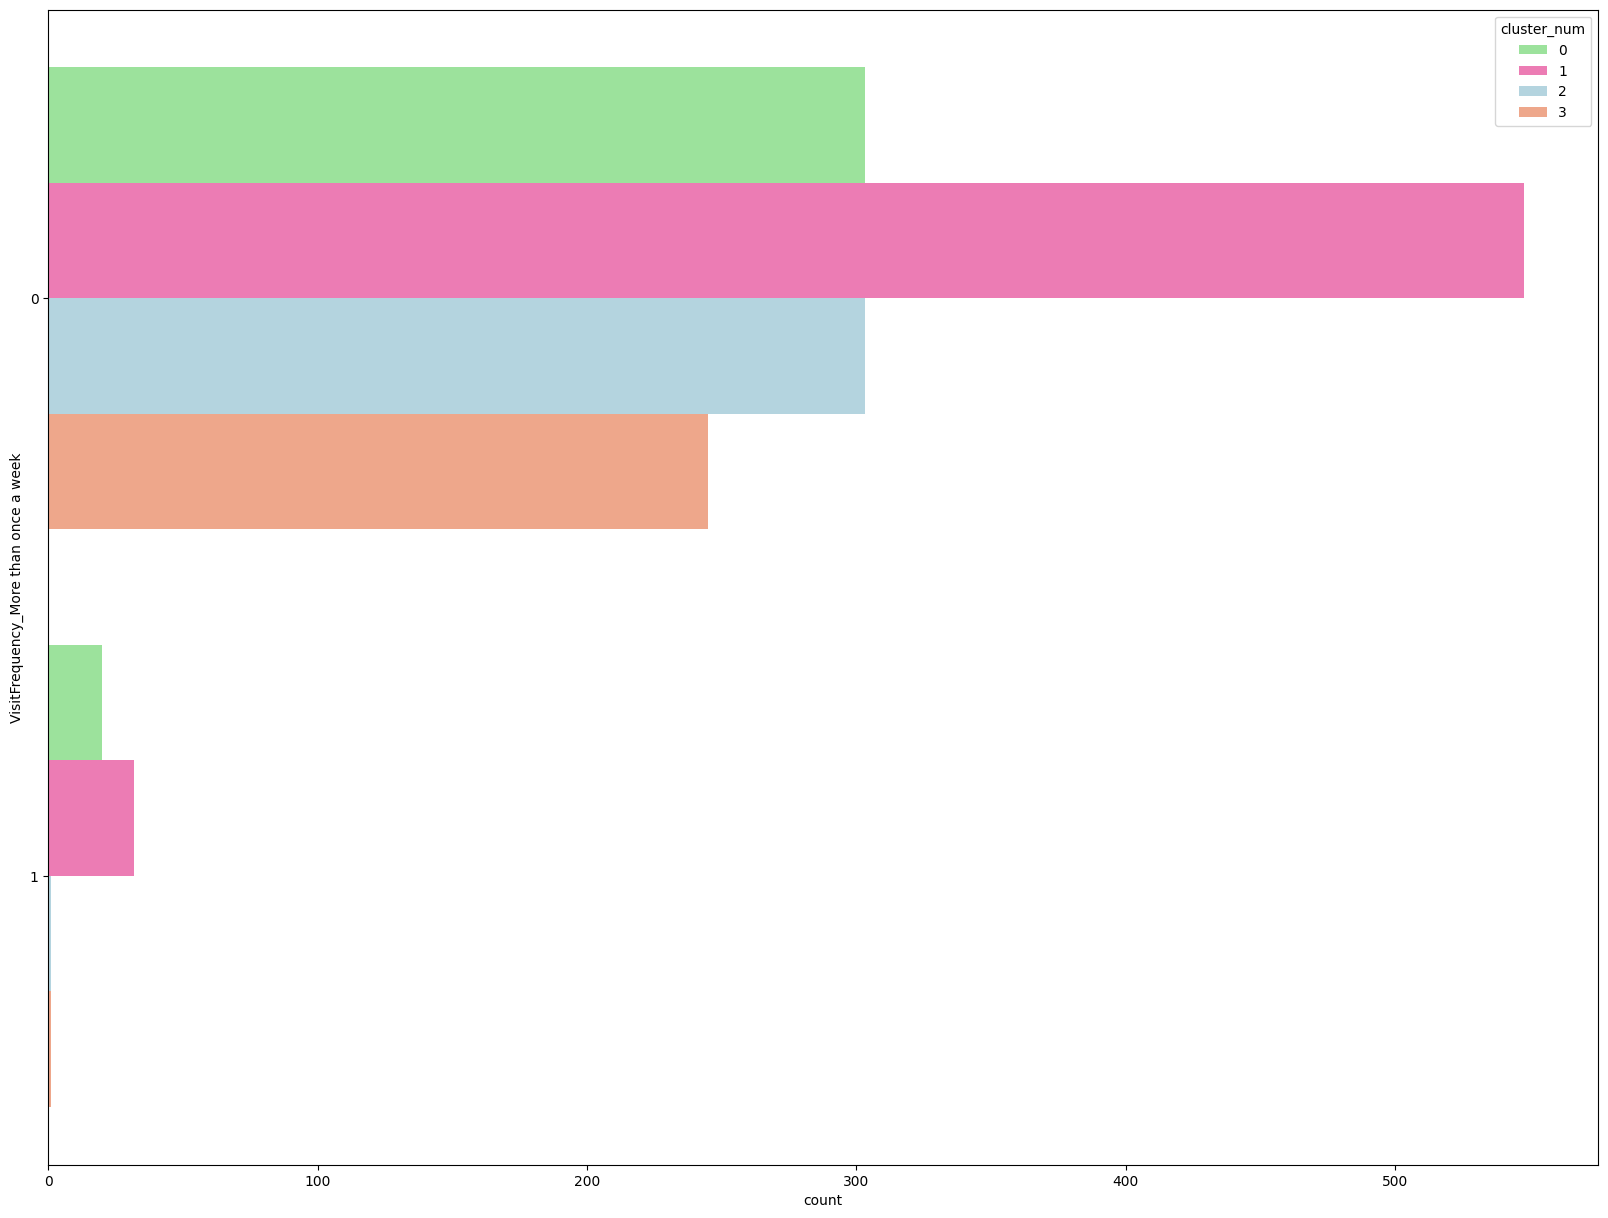

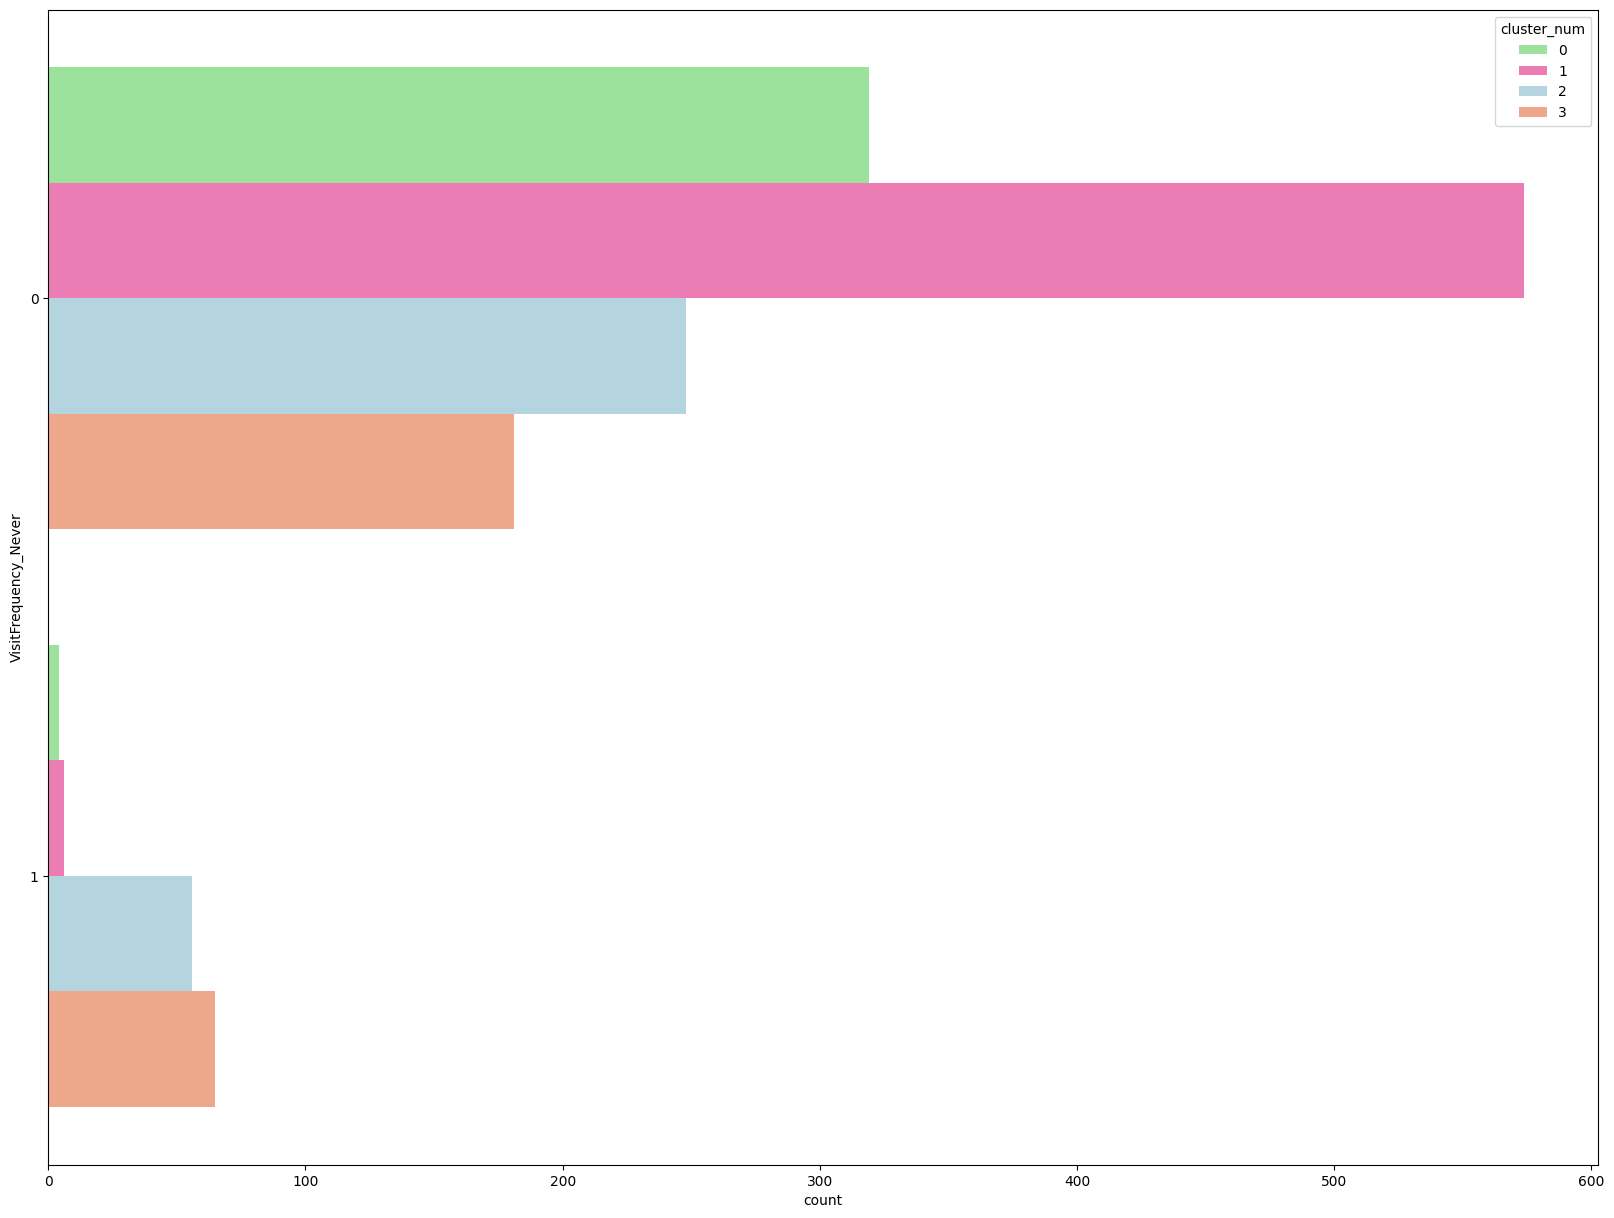

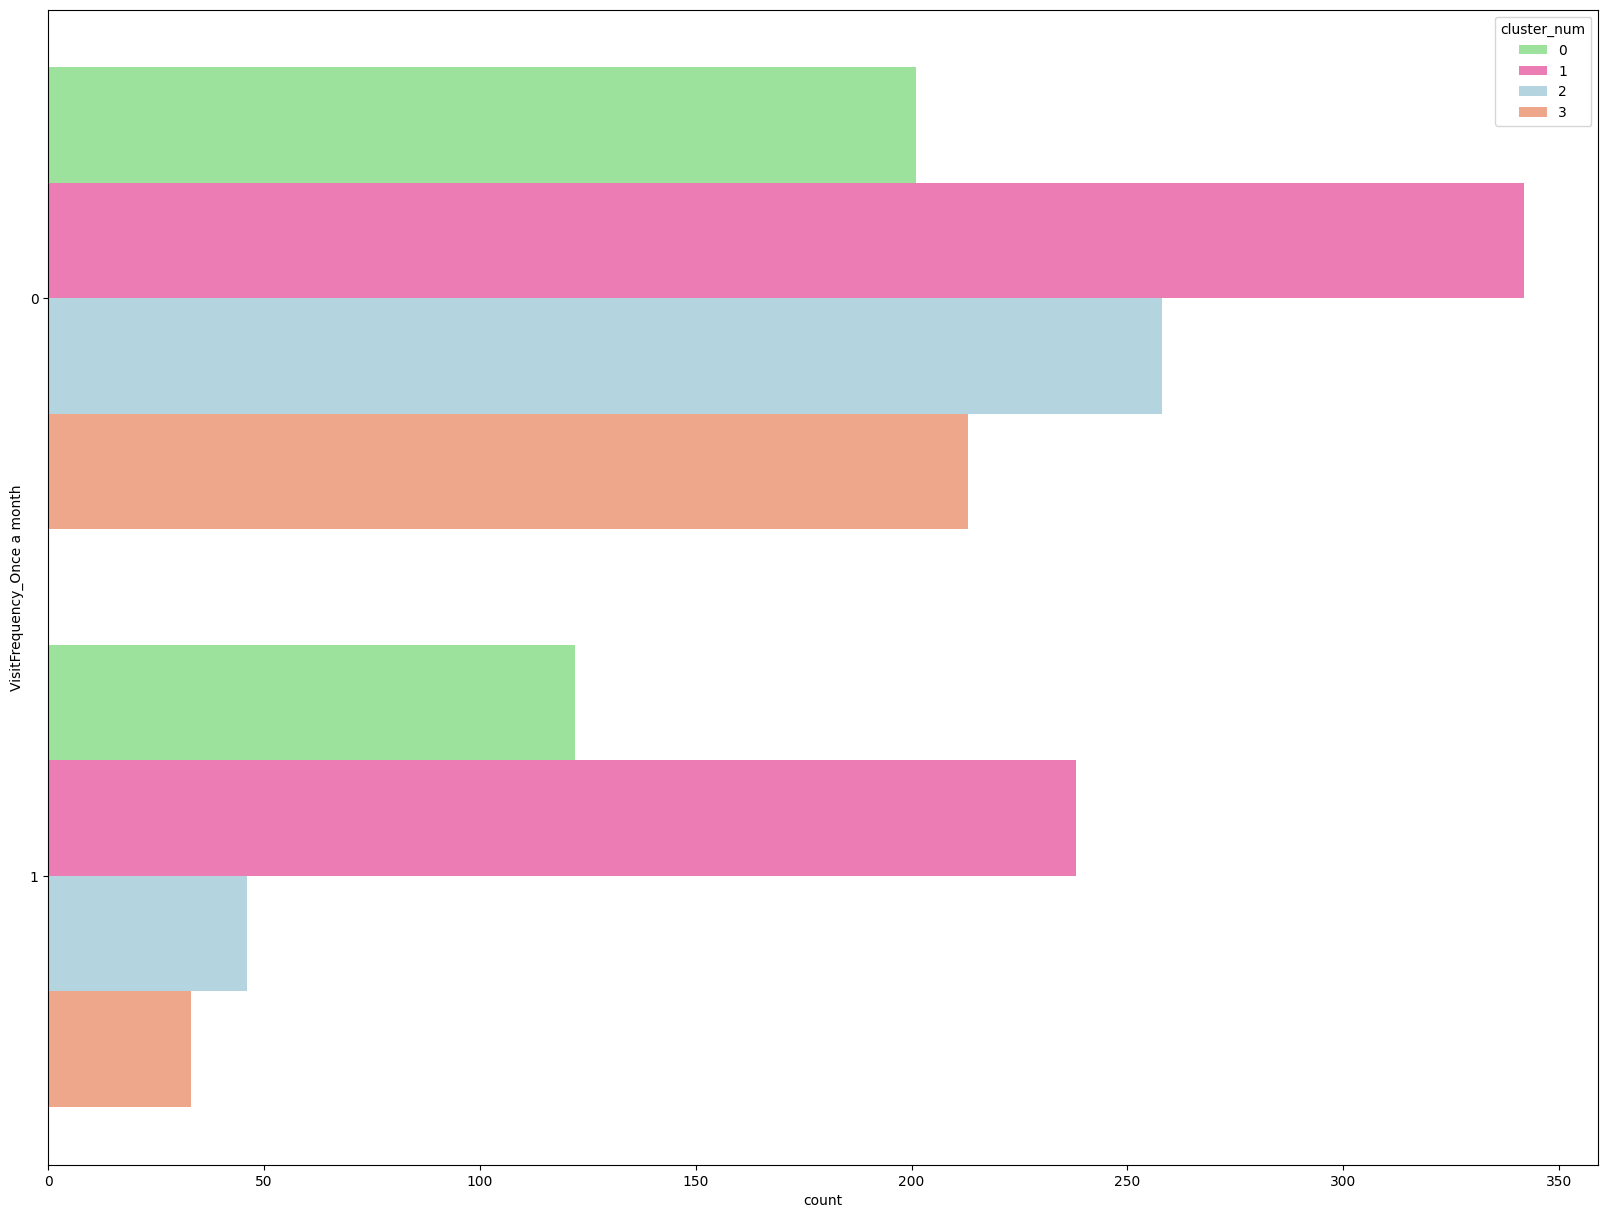

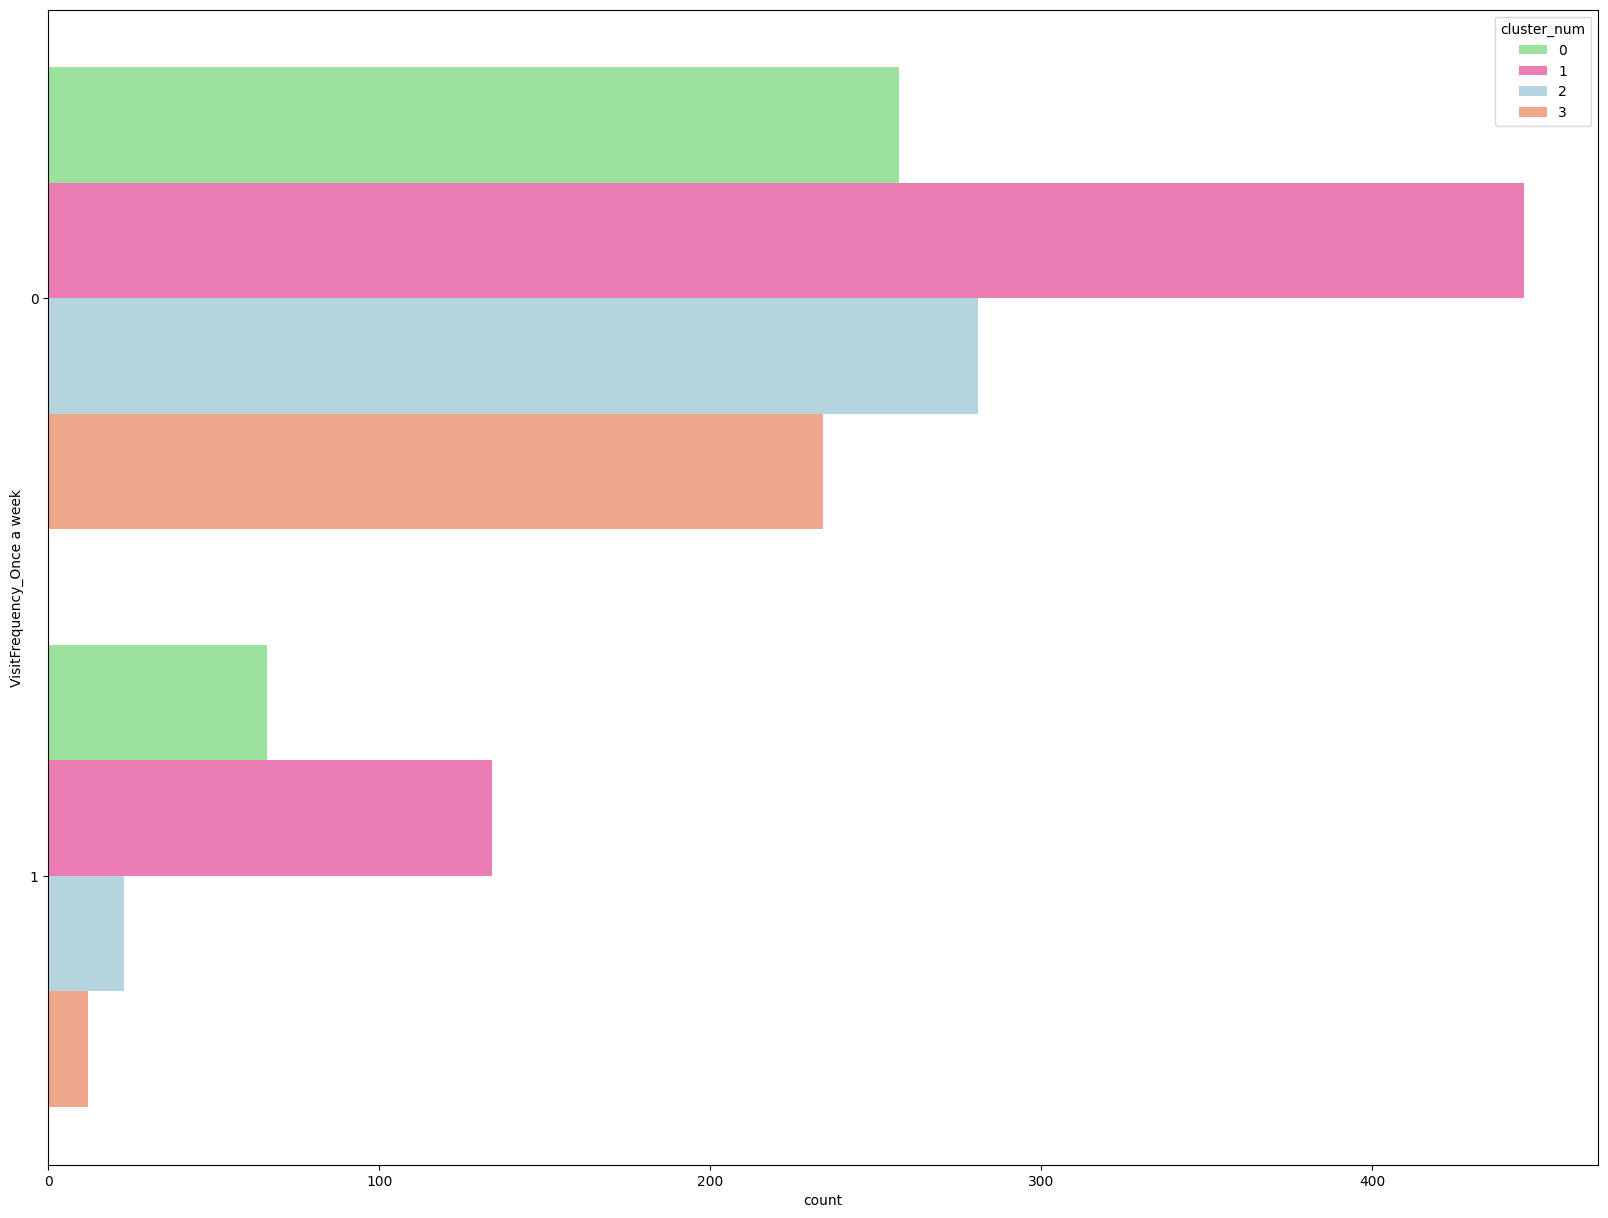

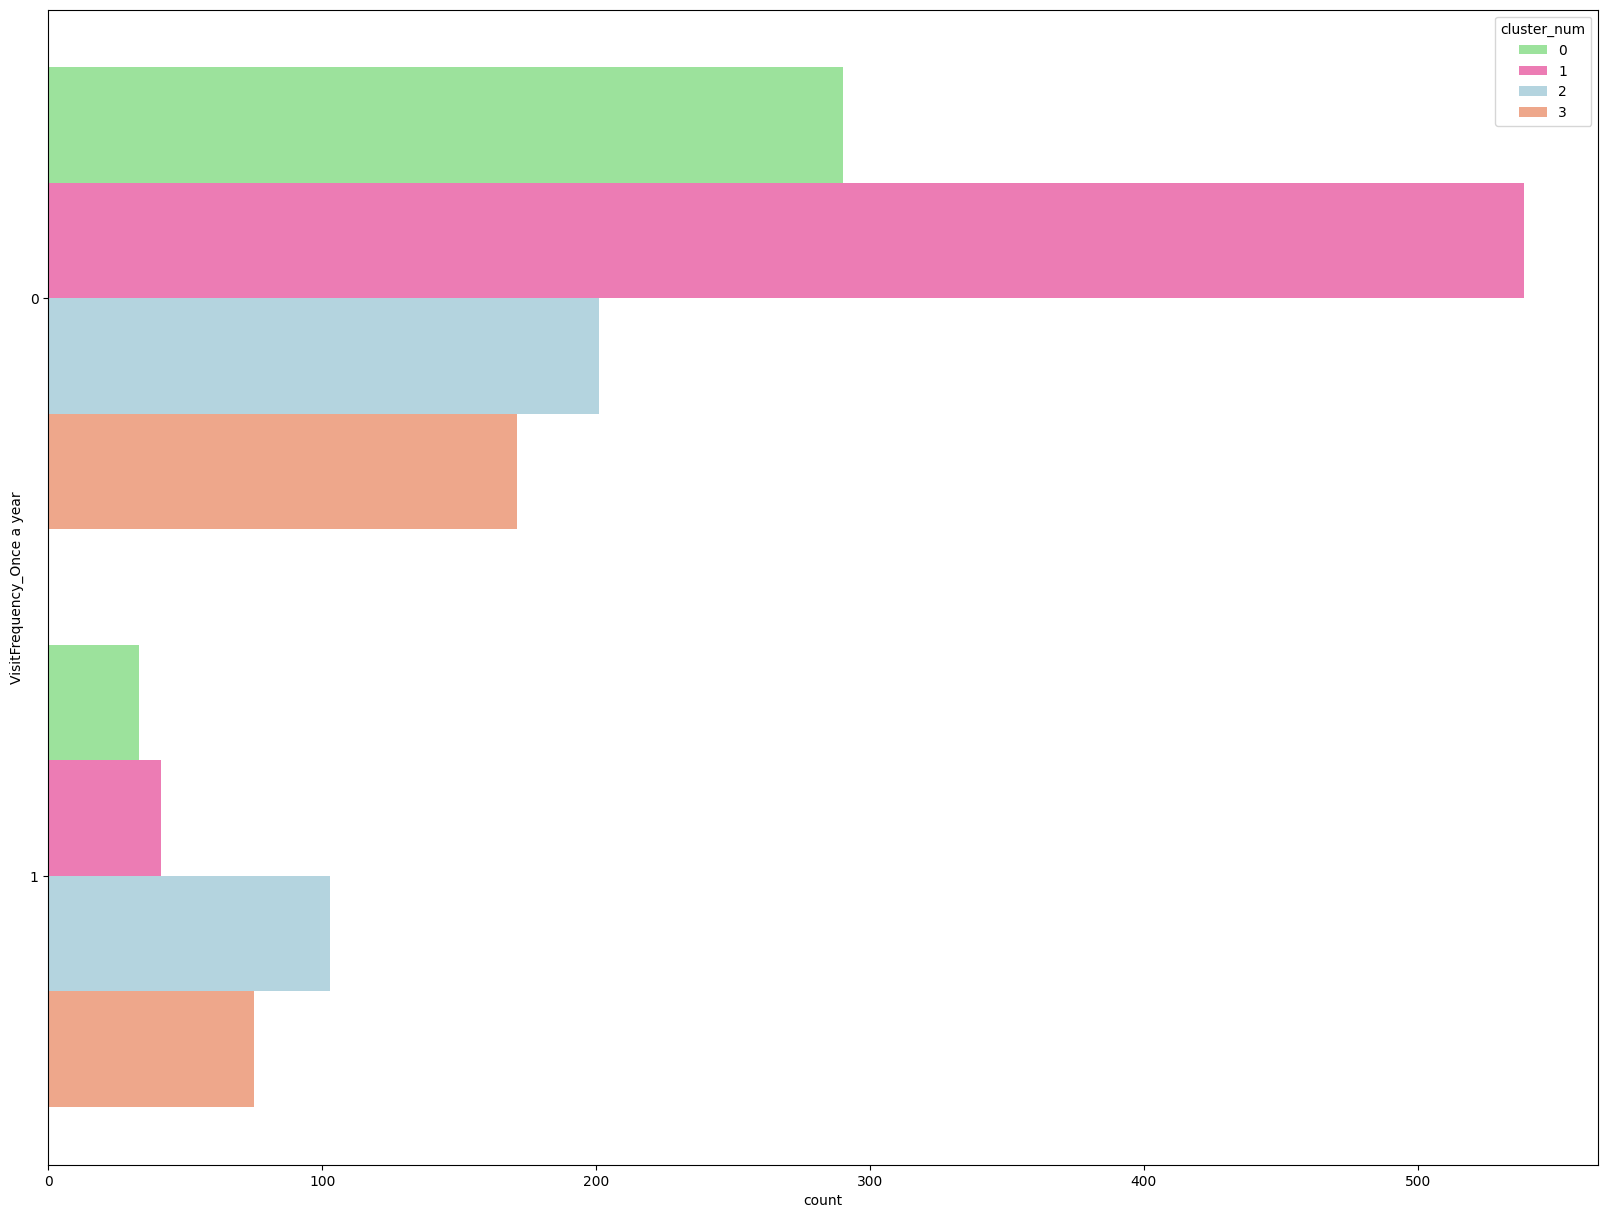

In [56]:
plt.figure(figsize = (9,4))
colors = ["#90EE90", "#FF69B4", "#ADD8E6", "#FFA07A"]
for i in data_en.columns:
    sns.countplot(y = data_en[i], hue = data_en['cluster_num'], data = data_en,palette=colors)
    plt.show()

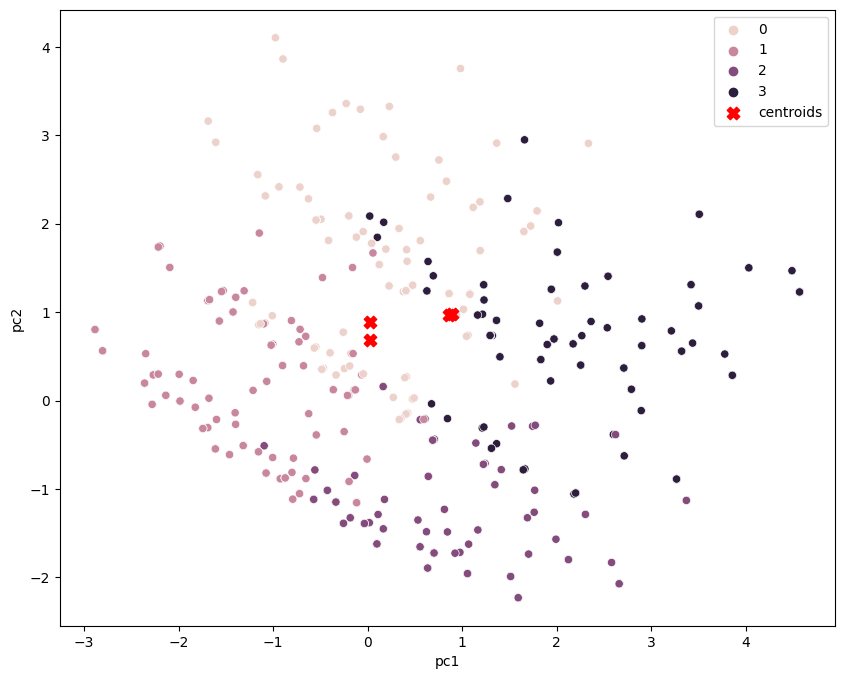

In [57]:
plt.figure(figsize=(10,8))

sns.scatterplot(data = pc_dataframe, x = "pc1", y = "pc2", hue = kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker = "X", c = "r", s = 80, label = "centroids")

plt.legend()
plt.show()

In [58]:
crosstab = pd.crosstab(data['cluster_num'], data['Like'])

<Figure size 500x500 with 0 Axes>

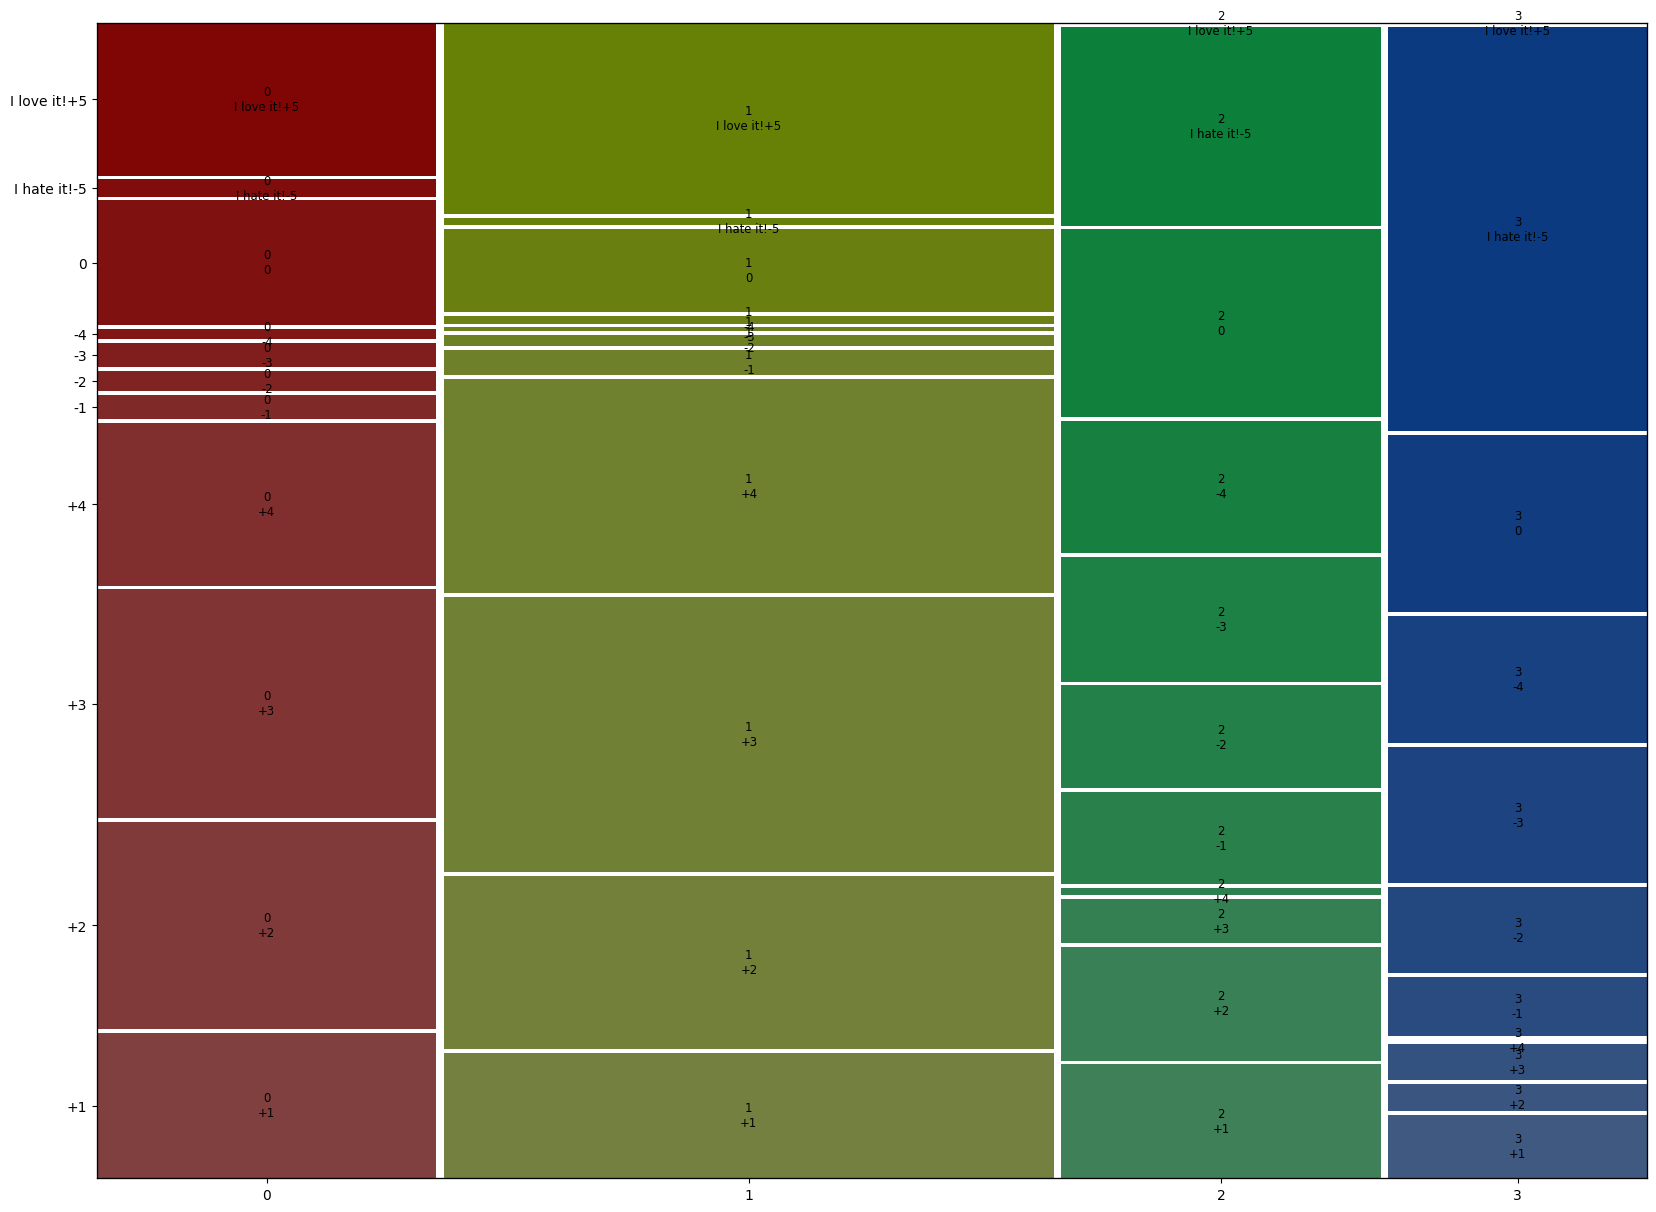

In [59]:
plt.figure(figsize=(5,5))
mosaic(crosstab.stack())
plt.show()

<Figure size 500x500 with 0 Axes>

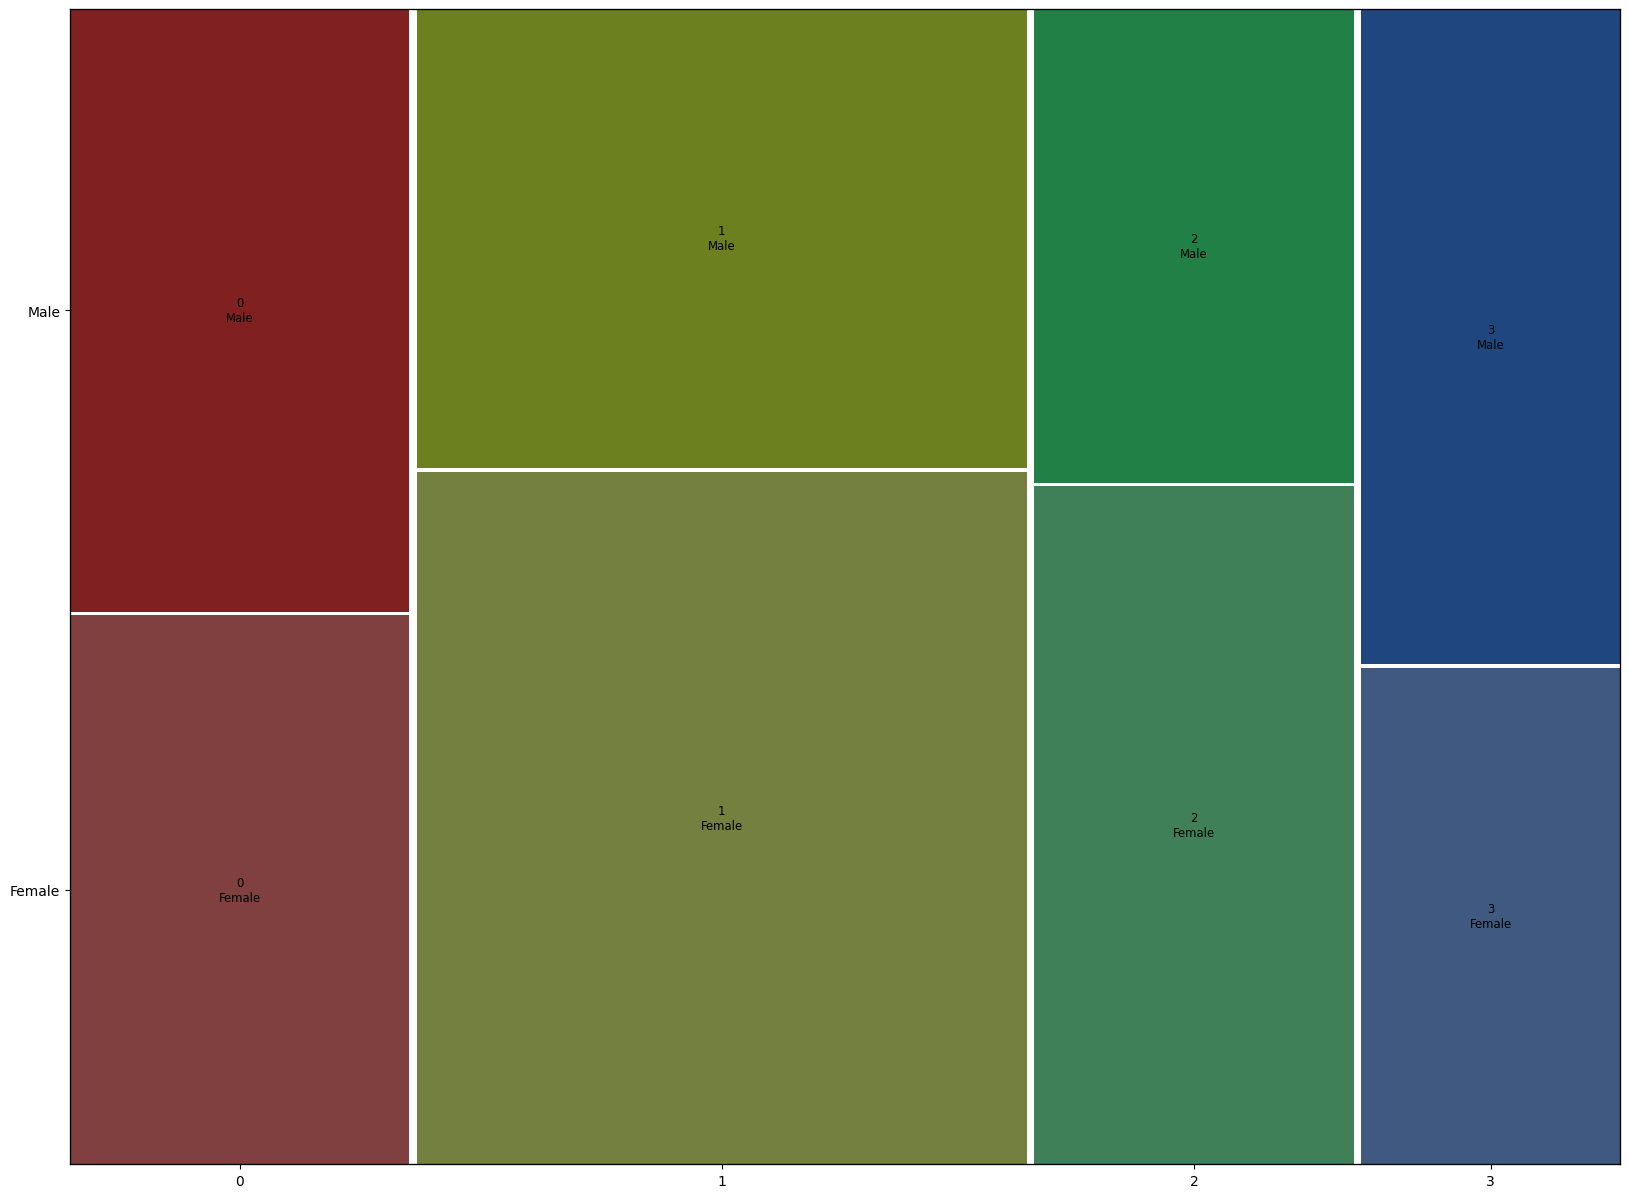

In [60]:
crosstab = pd.crosstab(data['cluster_num'], data['Gender'])
plt.figure(figsize = (5,5))
crosstab = crosstab[['Female', 'Male']]
mosaic(crosstab.stack())
plt.show()

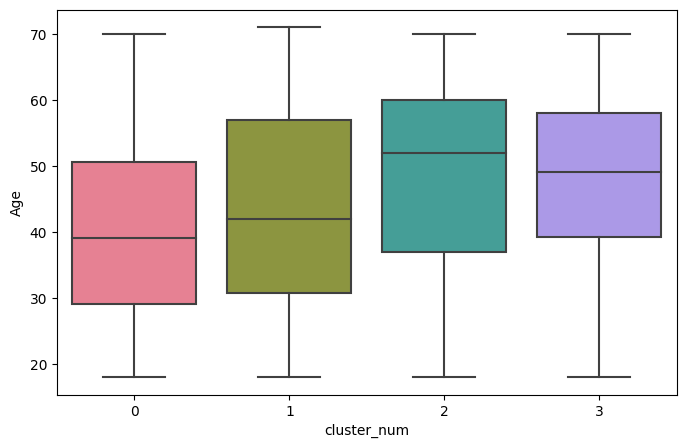

In [61]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster_num', y='Age', data=data_en, palette='husl')
plt.show()

# Target Segment

In [62]:
#visitfrequency
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])

visit = data.groupby('cluster_num')['VisitFrequency'].mean().reset_index()

print(visit)

   cluster_num  VisitFrequency
0            0        2.547988
1            1        2.584483
2            2        2.822368
3            3        2.654472


In [63]:
# calculating the mean of 'Like'

data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [65]:
# Convert 'VisitFrequency' to numerical values using label encoding
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])

# Calculate the mean of 'VisitFrequency' for each cluster
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()

# Convert 'Like' to numerical values using label encoding
data['Like'] = LabelEncoder().fit_transform(data['Like'])

# Calculate the mean of 'Like' for each cluster
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()

# Convert 'Gender' to numerical values using label encoding
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Calculate the mean of 'Gender' for each cluster
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [66]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.798762,2.547988
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.569106,6.739837,2.654472


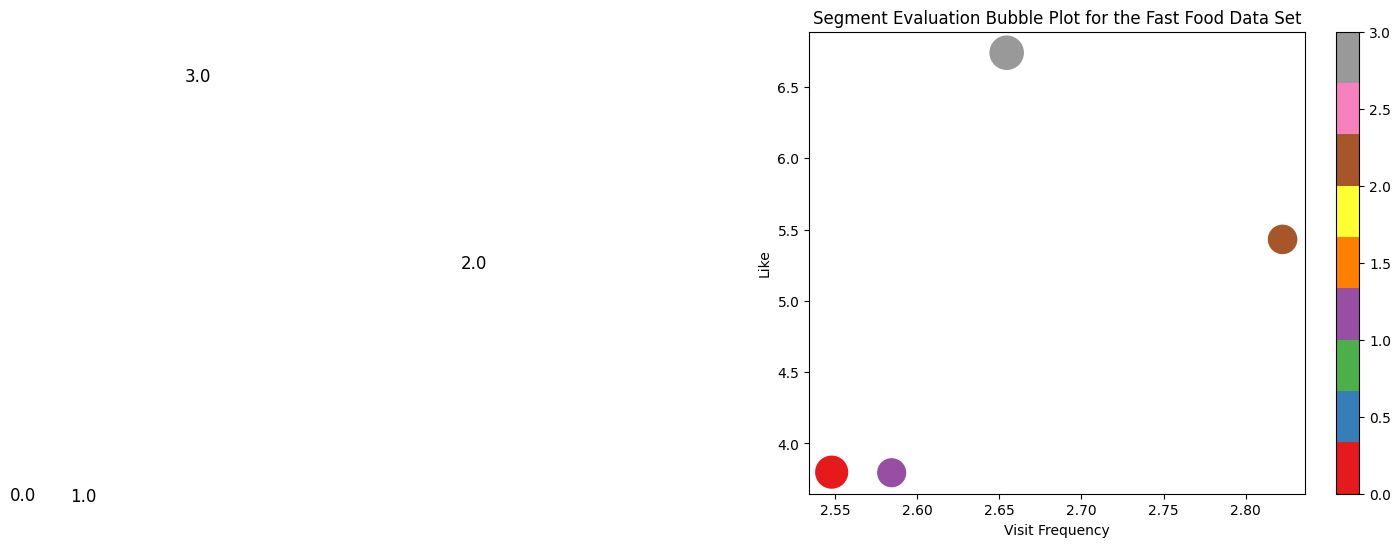

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(segment['VisitFrequency'], segment['Like'], s=segment['Gender']*1000, c=segment['cluster_num'], cmap='Set1')
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.title('Segment Evaluation Bubble Plot for the Fast Food Data Set')

for i in range(len(segment)):
    plt.text(segment.iloc[i]['VisitFrequency']-0.5, segment.iloc[i]['Like']-0.2, 
             str(segment.iloc[i]['cluster_num']), fontsize=12)

plt.colorbar()
plt.show()

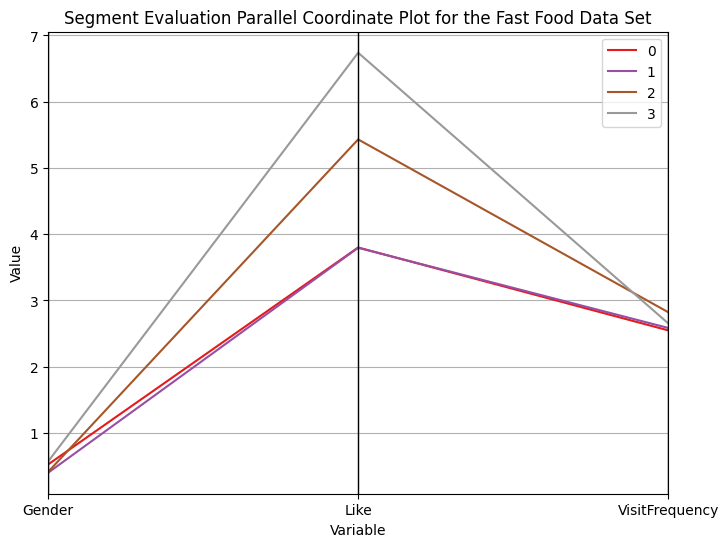

In [68]:
plt.figure(figsize=(8, 6))
parallel_coordinates(segment, 'cluster_num', colormap='Set1')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Segment Evaluation Parallel Coordinate Plot for the Fast Food Data Set')
plt.show()